# Data Preprocessing

In [ ]:
import pandas as pd
data = pd.read_csv(r'C:\Users\my pc\Downloads\fdra\final project\Bankruptcy_prediction.csv')
data.head()

reading first 5 Rows and all columns of dataset

#proceSS

#dataset import
#Balanced/not check
#Data preprocessing
#Missing Values
#Duplicate
#Oulier-Treated
#Logistic regression-feature engineering
#1Significance of IV-Accuracy+hypertuning parameter(F1score,Precision,recall)
#Balancing of data using SMOTE & Classification matrix change
#Outlier Detection-Isolation forest/Local Outlier Factor

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score, f1_score,ConfusionMatrixDisplay,classification_report

In [ ]:
data

In [22]:
data.shape

(6819, 96)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt                                                  6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [24]:
data.columns


Index(['Bankrupt', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit 

In [25]:
print('Number of duplicated data values in Company Bankruptcy Prediction Dataset -', data.duplicated().sum())

Number of duplicated data values in Company Bankruptcy Prediction Dataset - 0


In [26]:
data_null_or_not = data.isnull().sum()
print('Number of null data values in Company Bankruptcy Prediction Dataset -', len(data_null_or_not[data_null_or_not>0]))

Number of null data values in Company Bankruptcy Prediction Dataset - 0


In [27]:
# Let's look at some statistical information about our data.
data.describe()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholders Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


C:\Users\my pc\AppData\Local\Temp\ipykernel_8132\3789213918.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax)


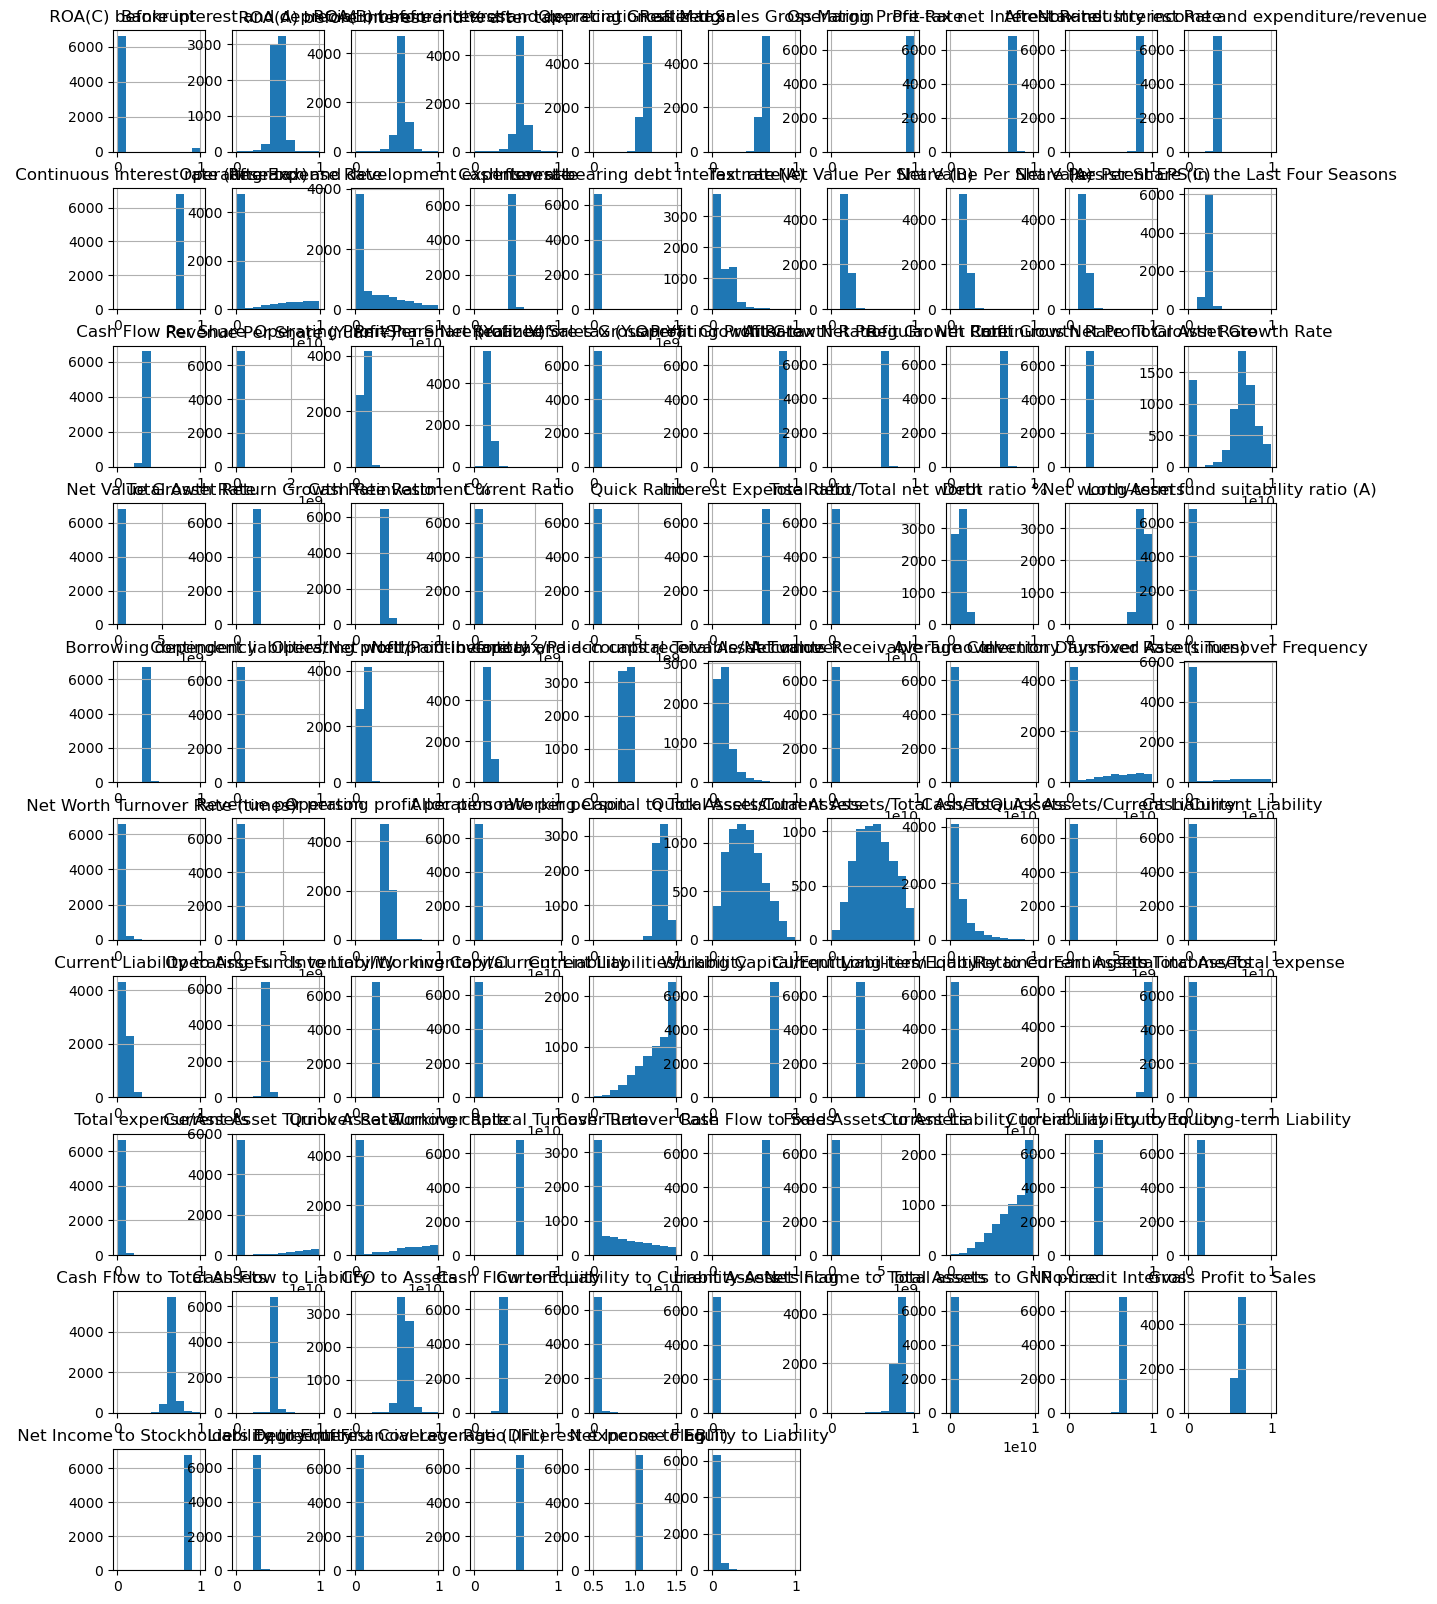

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

For column :  ROA(C) before interest and depreciation before interest


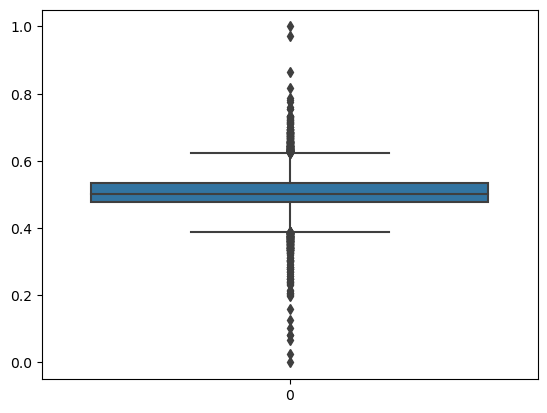

For column :  ROA(B) before interest and depreciation after tax


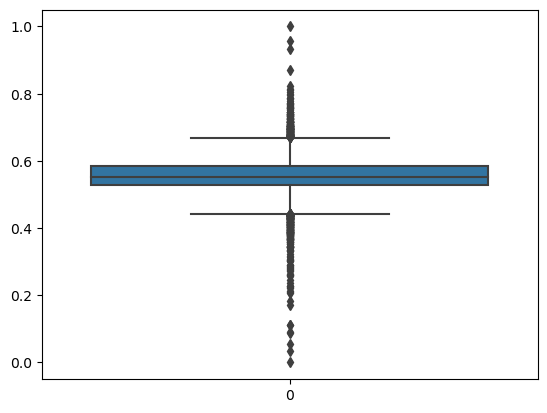

For column :  Operating Gross Margin


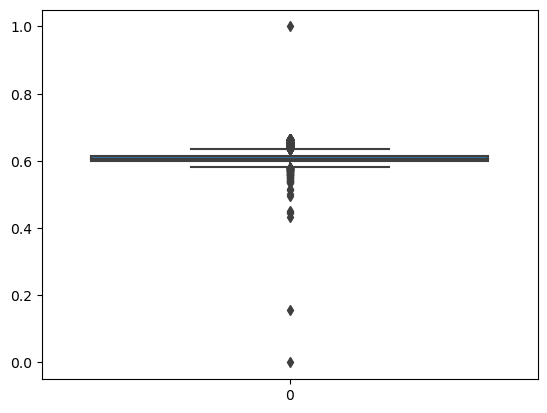

For column :  Realized Sales Gross Margin


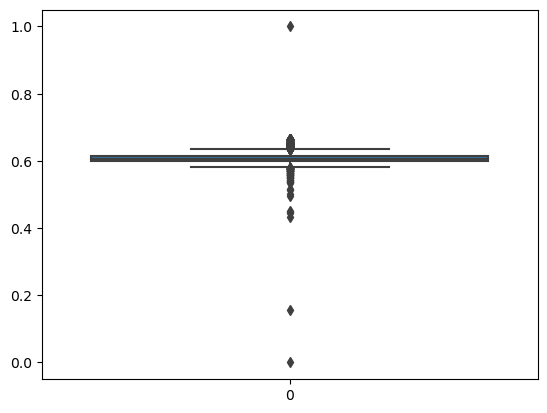

For column :  Operating Profit Rate


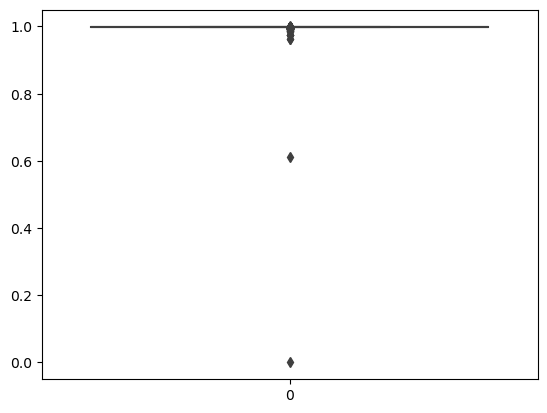

For column :  Pre-tax net Interest Rate


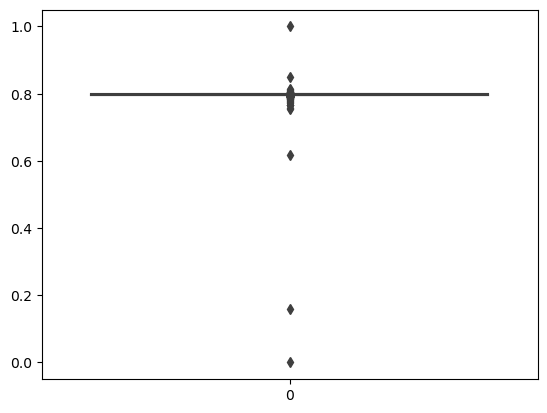

For column :  After-tax net Interest Rate


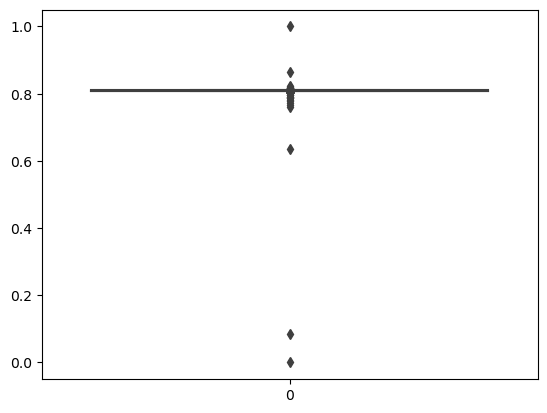

For column :  Non-industry income and expenditure/revenue


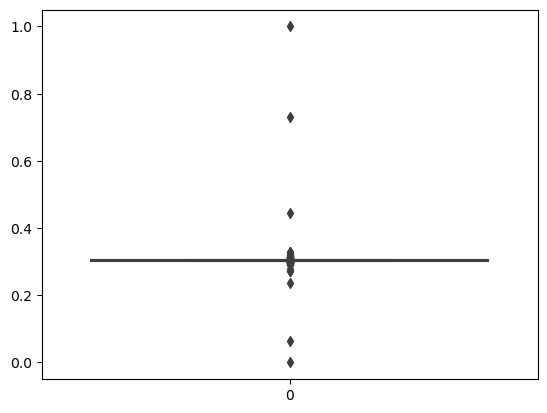

For column :  Continuous interest rate (after tax)


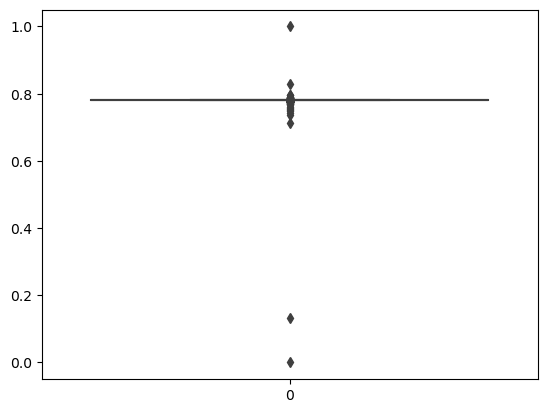

For column :  Operating Expense Rate


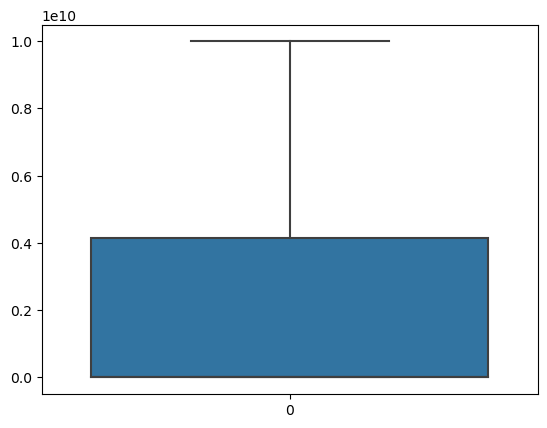

For column :  Research and development expense rate


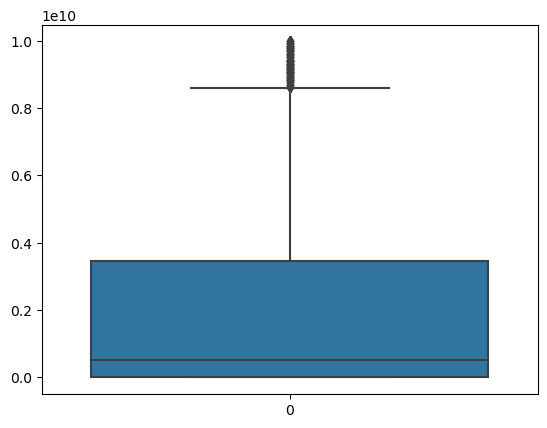

For column :  Cash flow rate


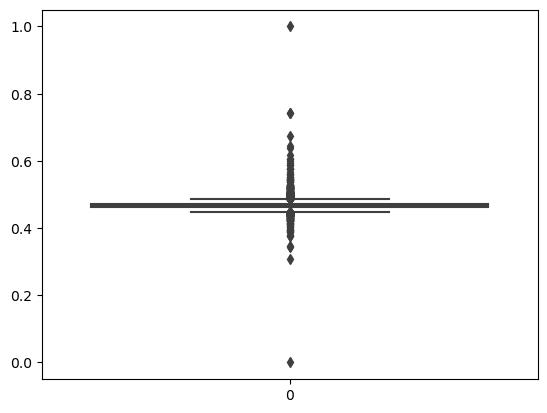

For column :  Interest-bearing debt interest rate


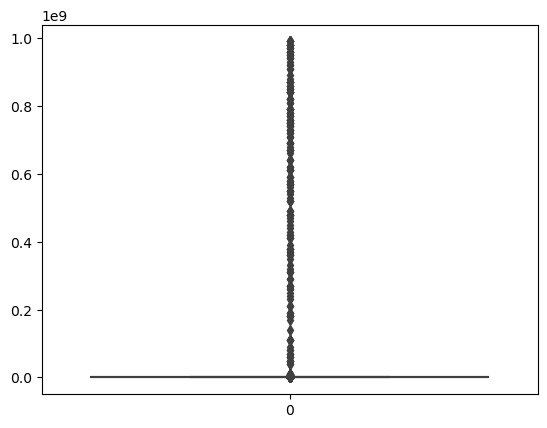

For column :  Tax rate (A)


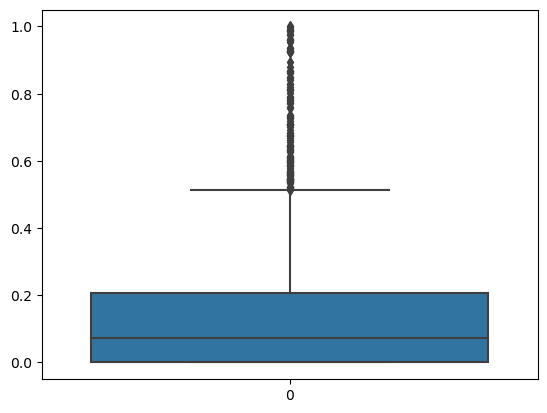

For column :  Net Value Per Share (B)


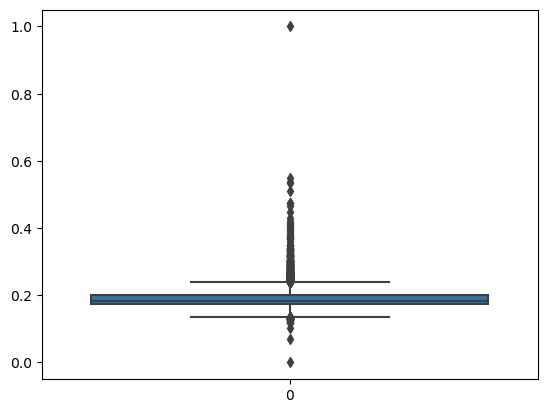

For column :  Net Value Per Share (A)


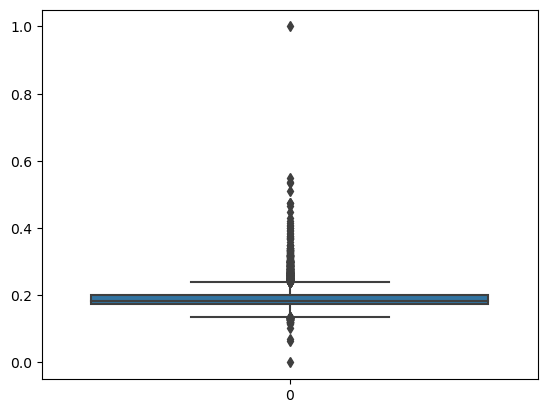

For column :  Net Value Per Share (C)


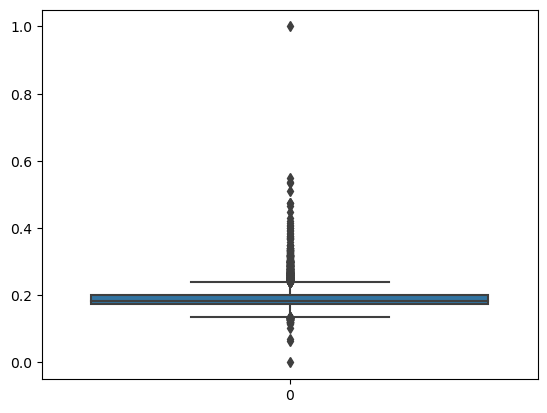

For column :  Persistent EPS in the Last Four Seasons


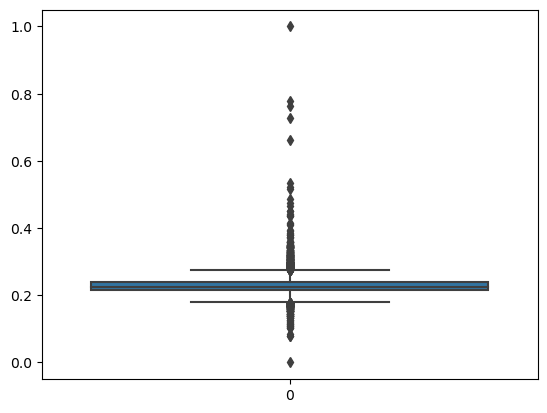

For column :  Cash Flow Per Share


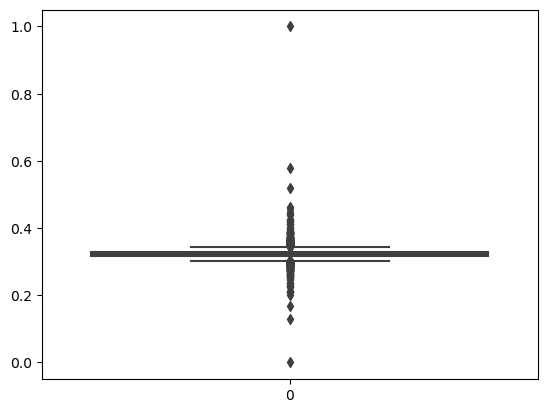

For column :  Revenue Per Share (Yuan ¥)


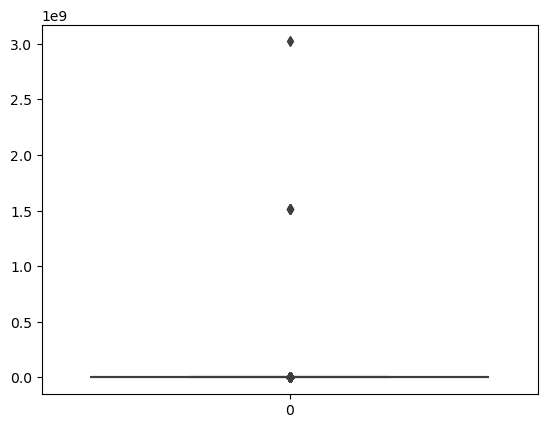

For column :  Operating Profit Per Share (Yuan ¥)


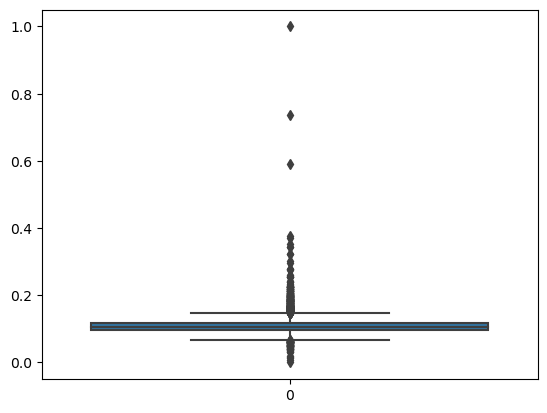

For column :  Per Share Net profit before tax (Yuan ¥)


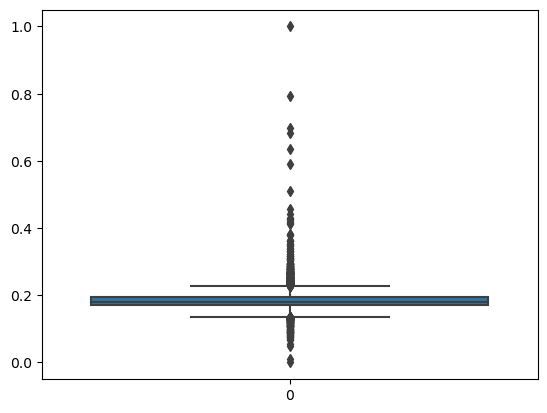

For column :  Realized Sales Gross Profit Growth Rate


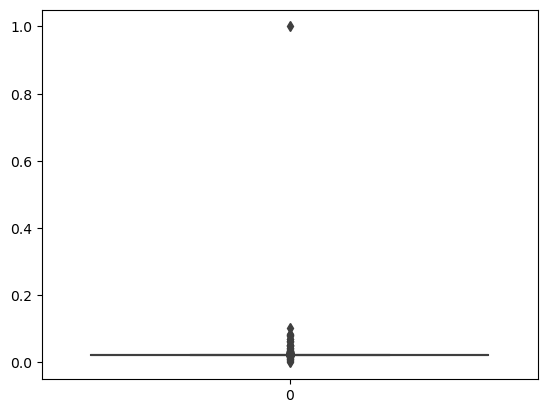

For column :  Operating Profit Growth Rate


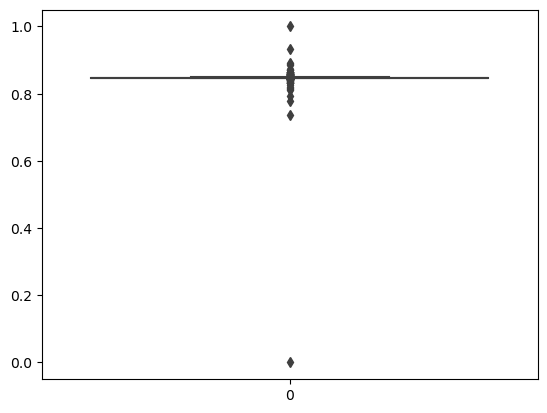

For column :  After-tax Net Profit Growth Rate


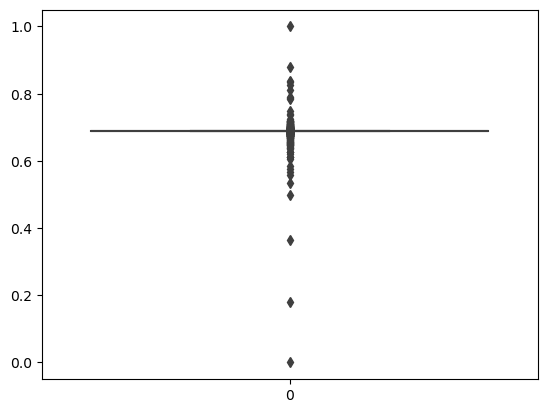

For column :  Regular Net Profit Growth Rate


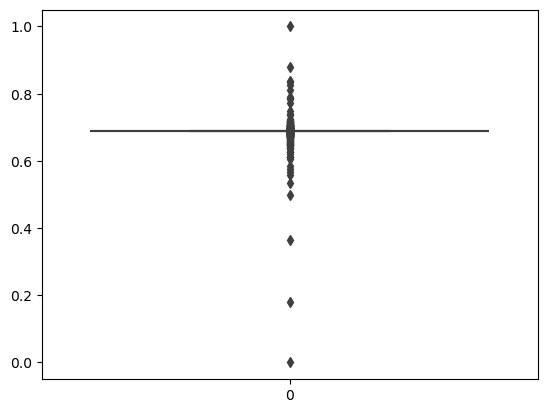

For column :  Continuous Net Profit Growth Rate


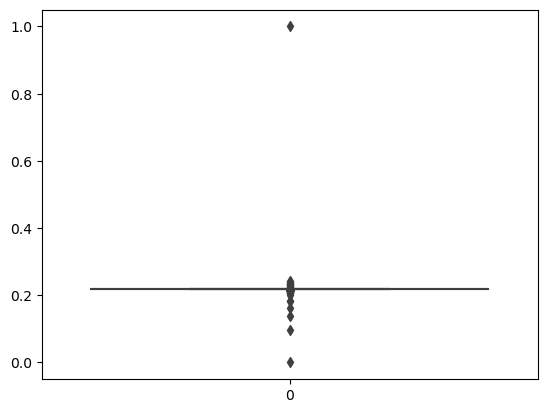

For column :  Total Asset Growth Rate


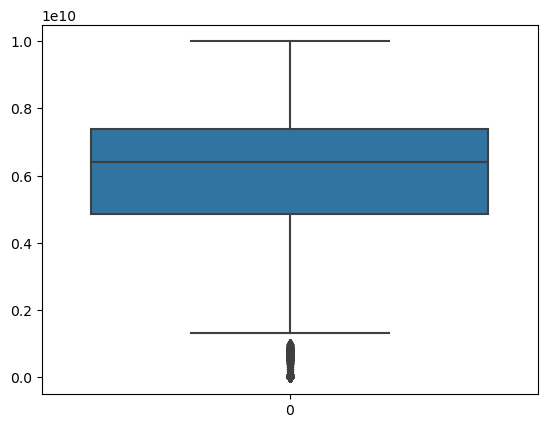

For column :  Net Value Growth Rate


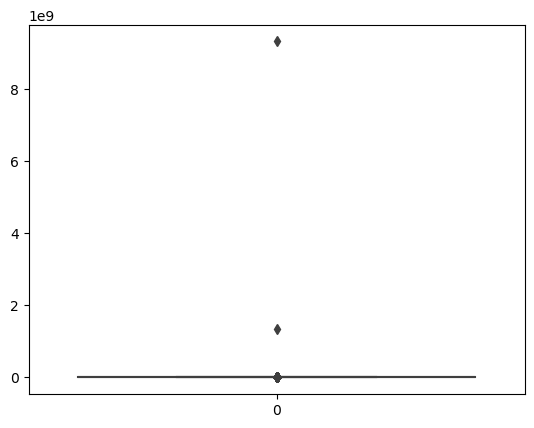

For column :  Total Asset Return Growth Rate Ratio


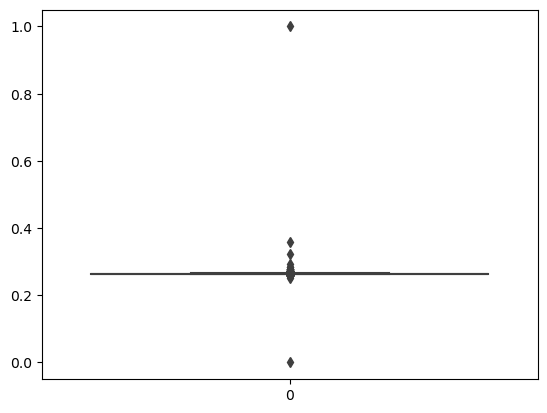

For column :  Cash Reinvestment %


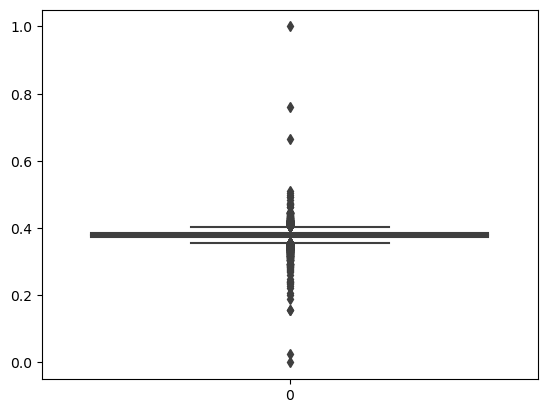

For column :  Current Ratio


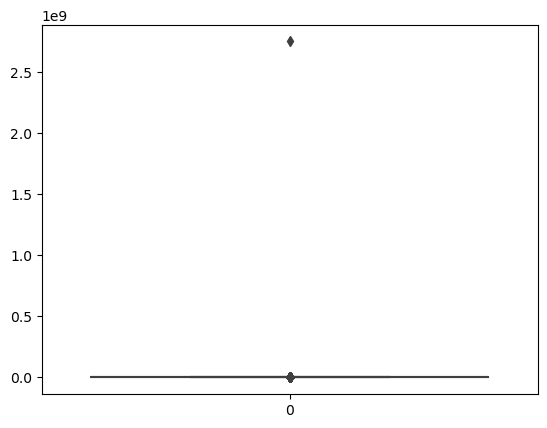

For column :  Quick Ratio


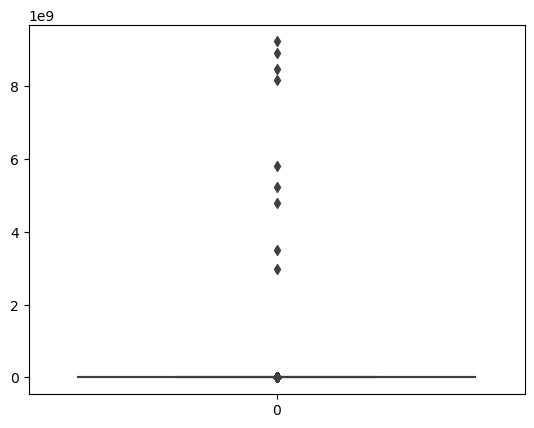

For column :  Interest Expense Ratio


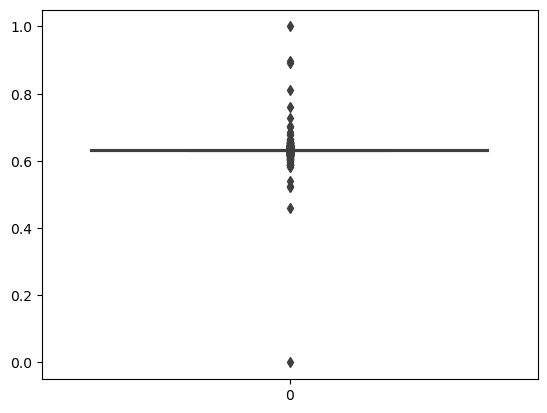

For column :  Total debt/Total net worth


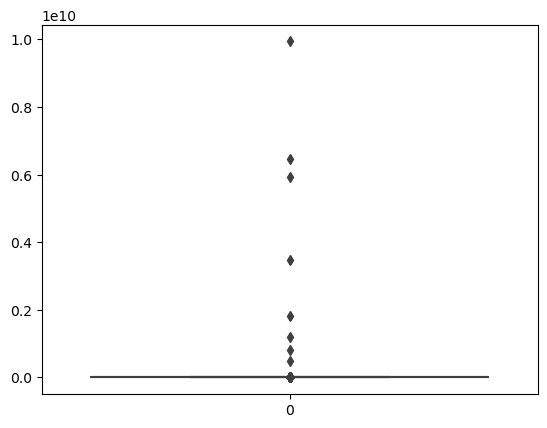

For column :  Debt ratio %


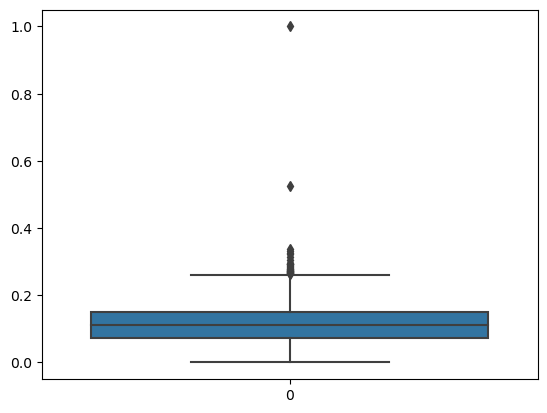

For column :  Net worth/Assets


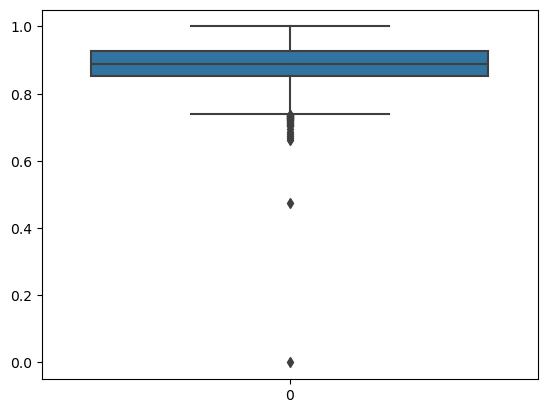

For column :  Long-term fund suitability ratio (A)


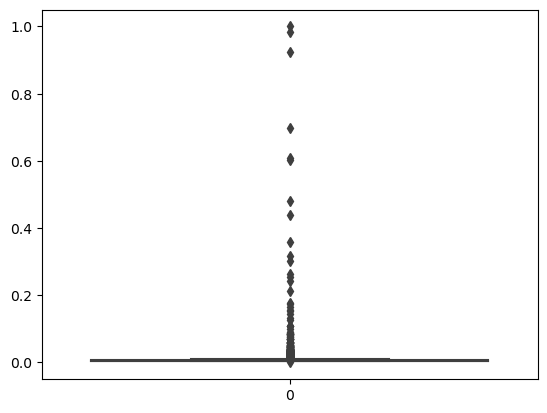

For column :  Borrowing dependency


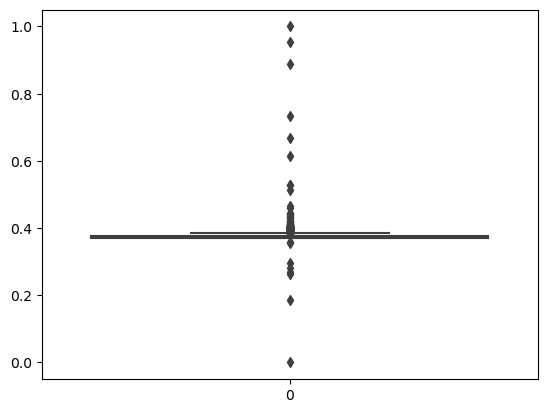

For column :  Contingent liabilities/Net worth


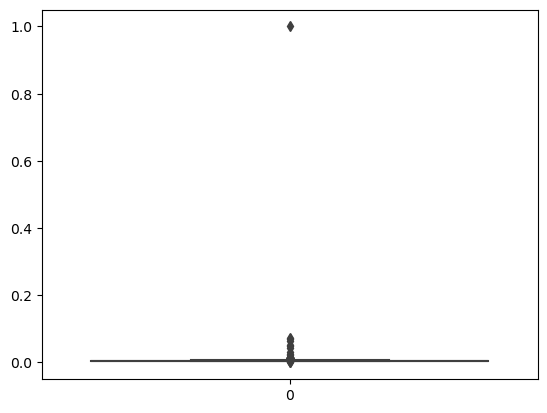

For column :  Operating profit/Paid-in capital


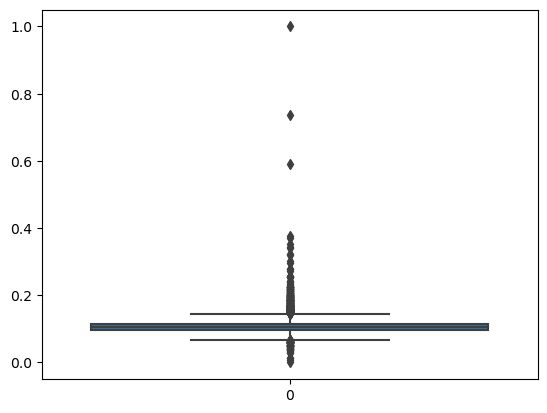

For column :  Net profit before tax/Paid-in capital


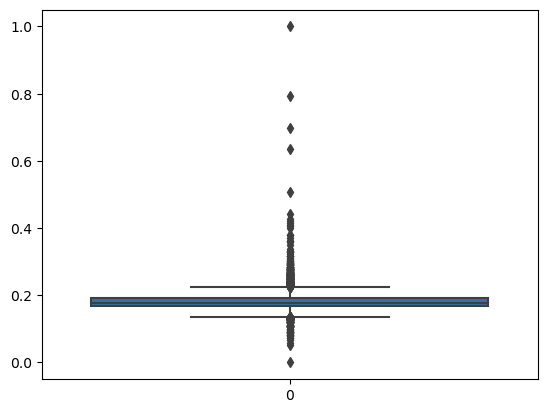

For column :  Inventory and accounts receivable/Net value


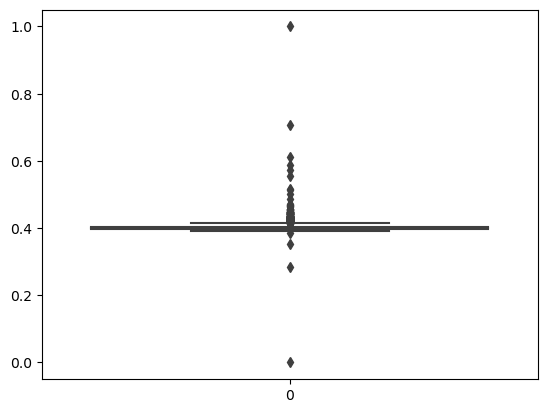

For column :  Total Asset Turnover


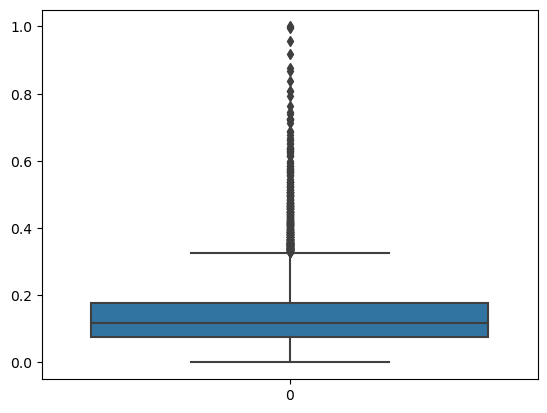

For column :  Accounts Receivable Turnover


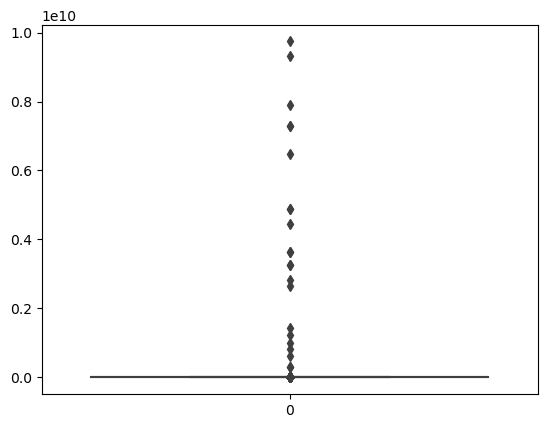

For column :  Average Collection Days


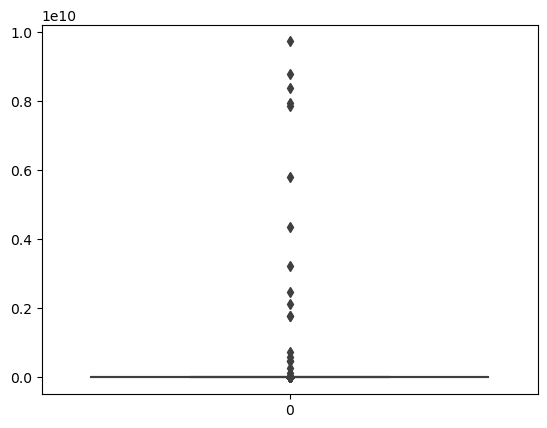

For column :  Inventory Turnover Rate (times)


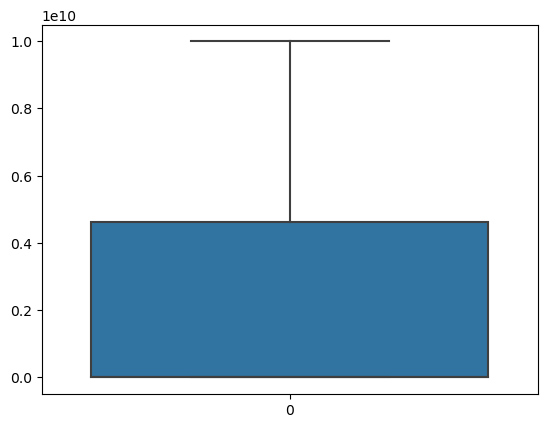

For column :  Fixed Assets Turnover Frequency


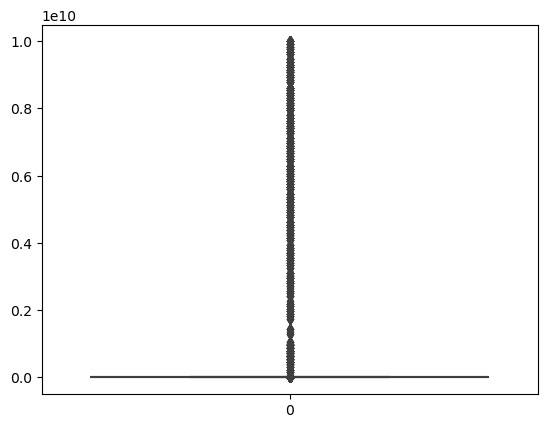

For column :  Net Worth Turnover Rate (times)


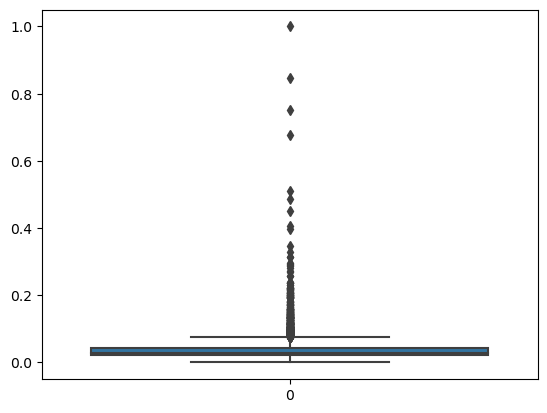

For column :  Revenue per person


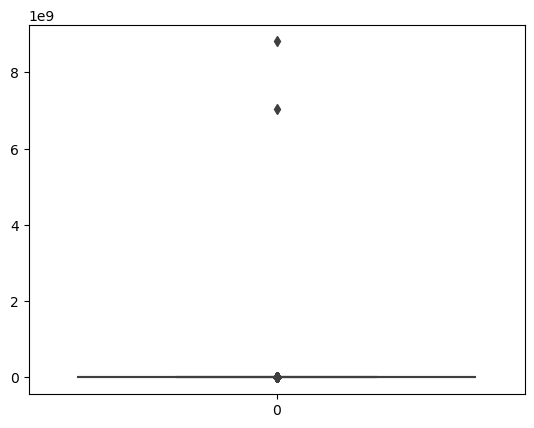

For column :  Operating profit per person


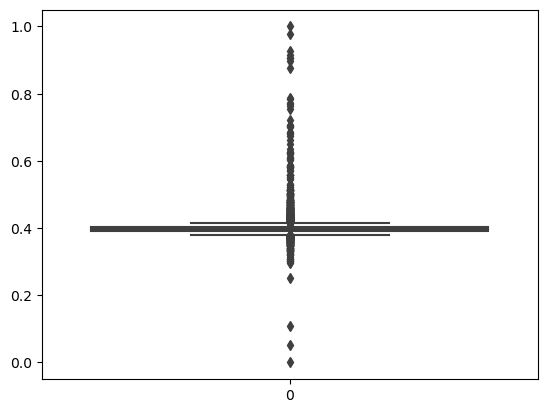

For column :  Allocation rate per person


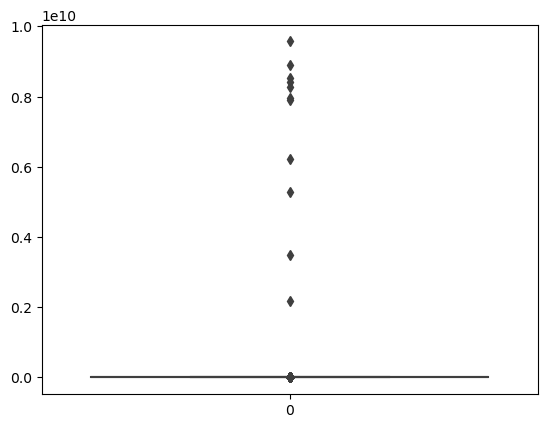

For column :  Working Capital to Total Assets


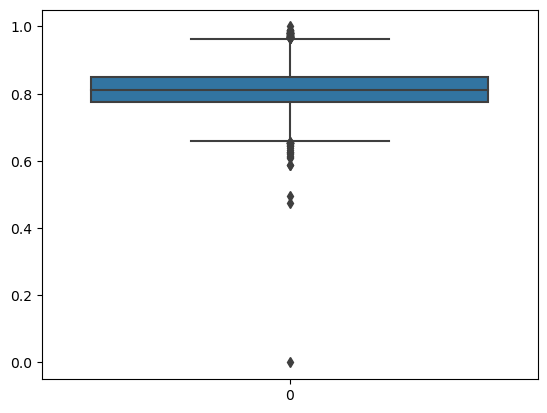

For column :  Quick Assets/Total Assets


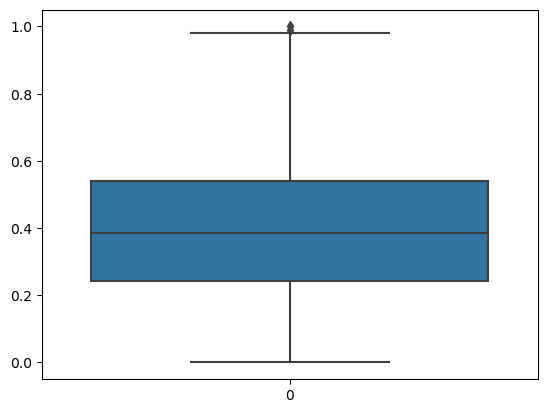

For column :  Current Assets/Total Assets


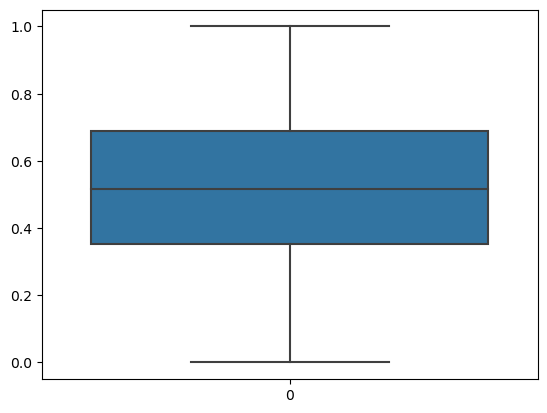

For column :  Cash/Total Assets


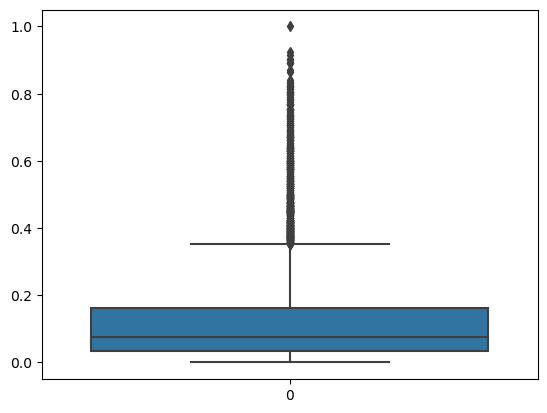

For column :  Quick Assets/Current Liability


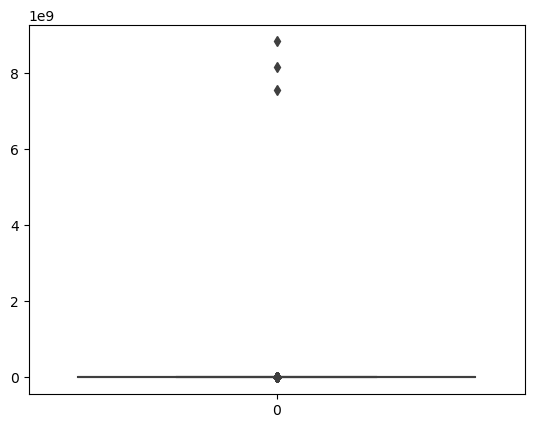

For column :  Cash/Current Liability


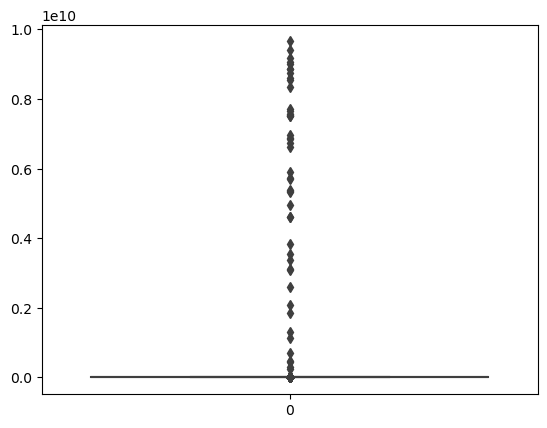

For column :  Current Liability to Assets


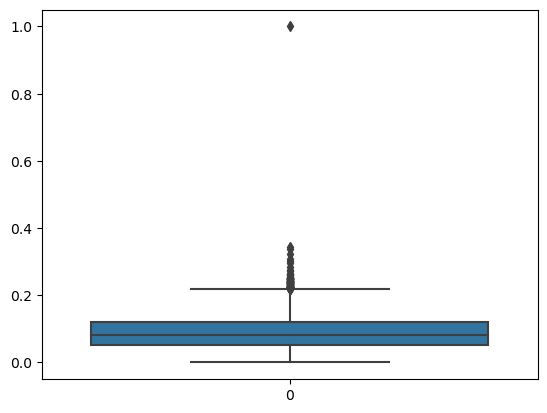

For column :  Operating Funds to Liability


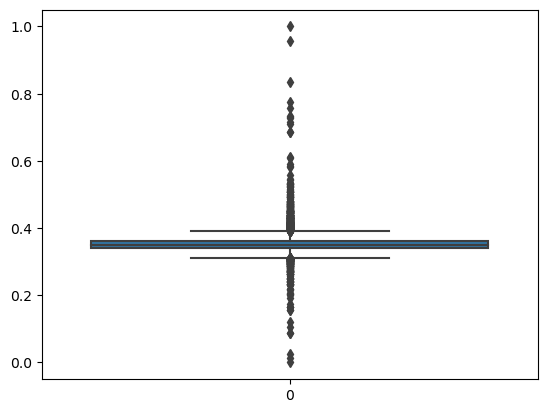

For column :  Inventory/Working Capital


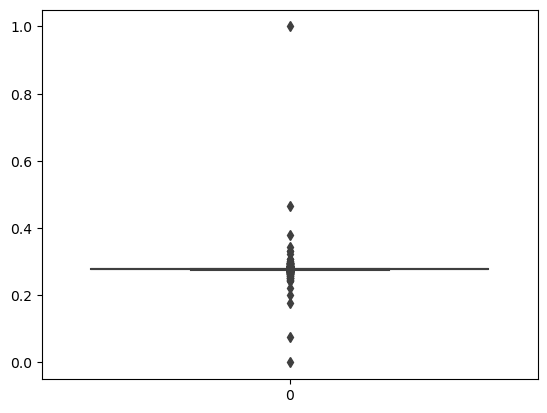

For column :  Inventory/Current Liability


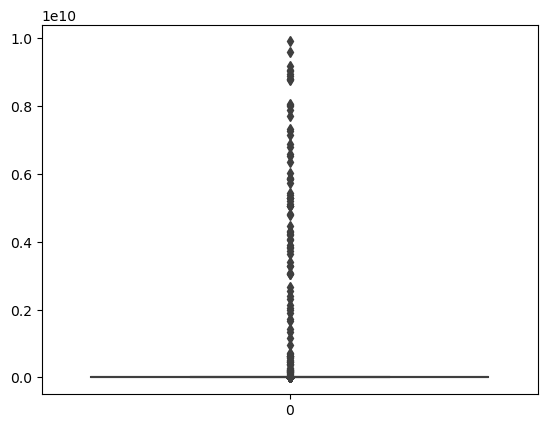

For column :  Current Liabilities/Liability


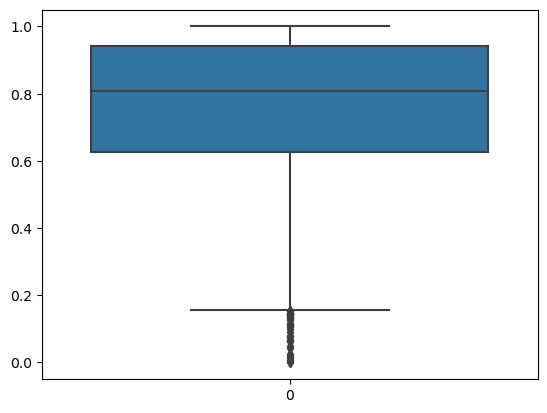

For column :  Working Capital/Equity


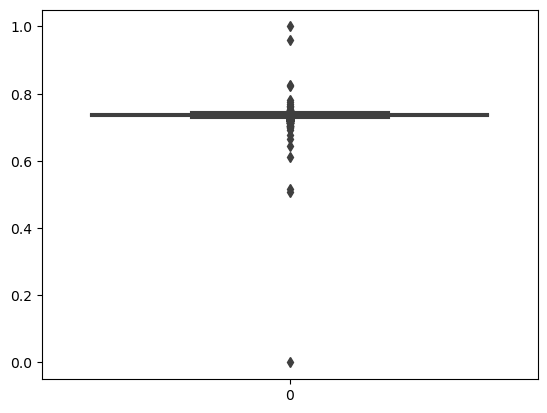

For column :  Current Liabilities/Equity


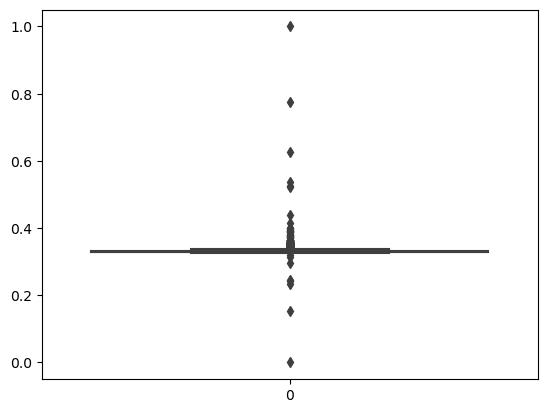

For column :  Long-term Liability to Current Assets


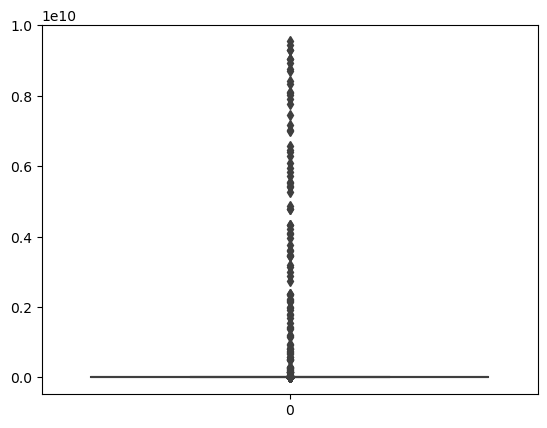

For column :  Retained Earnings to Total Assets


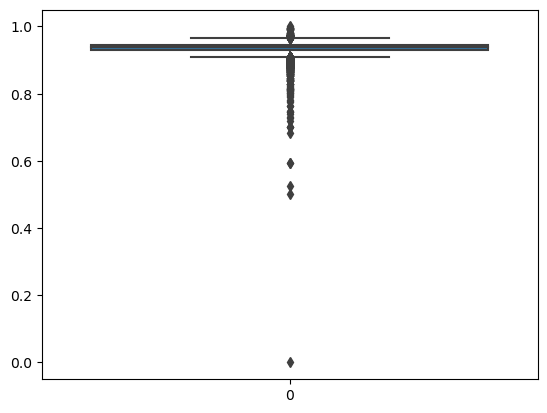

For column :  Total income/Total expense


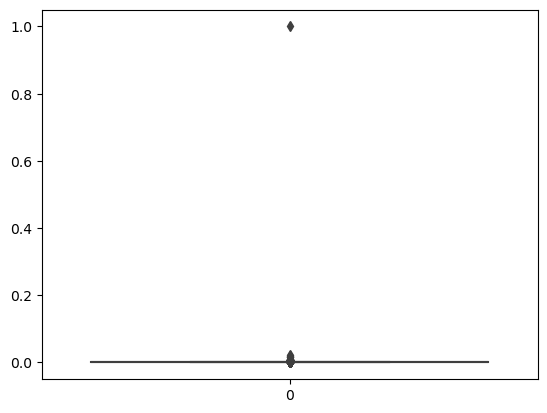

For column :  Total expense/Assets


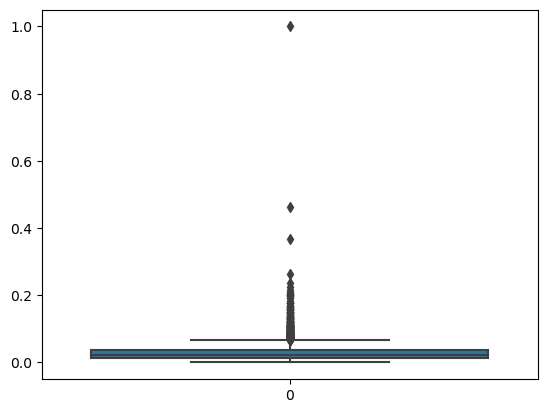

For column :  Current Asset Turnover Rate


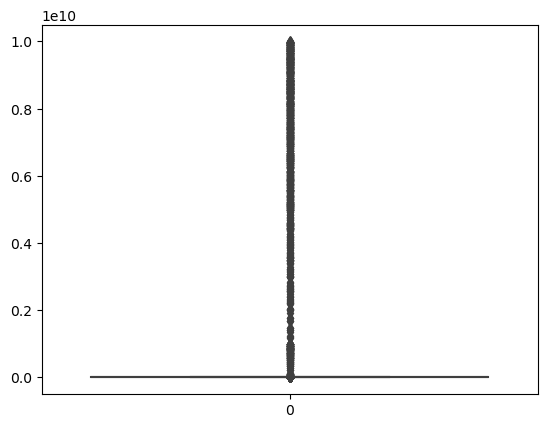

For column :  Quick Asset Turnover Rate


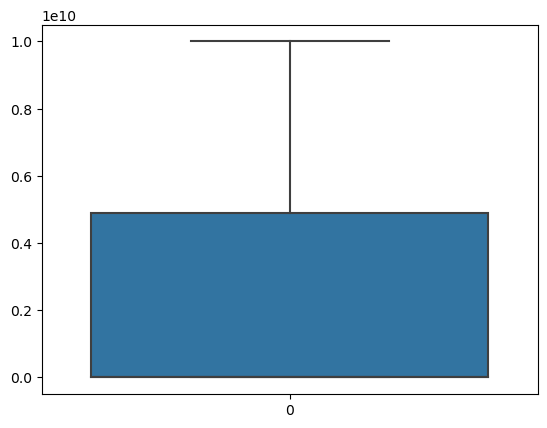

For column :  Working capitcal Turnover Rate


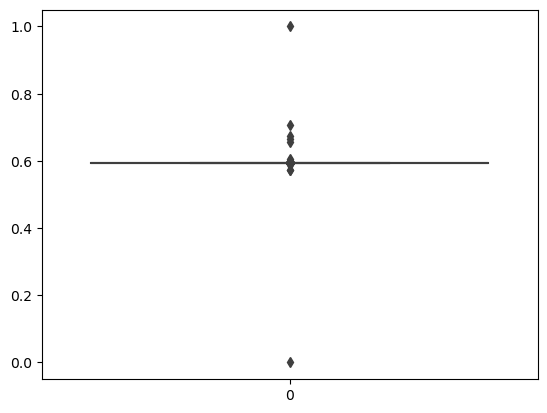

For column :  Cash Turnover Rate


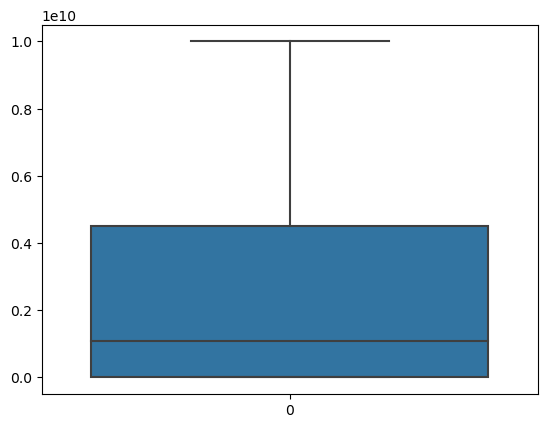

For column :  Cash Flow to Sales


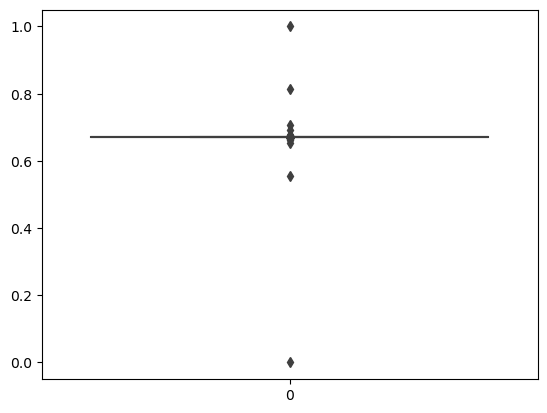

For column :  Fixed Assets to Assets


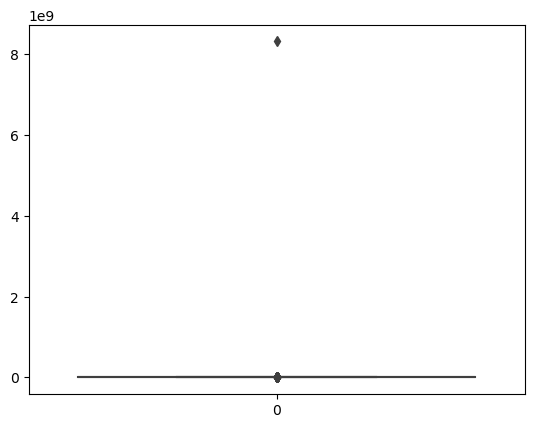

For column :  Current Liability to Liability


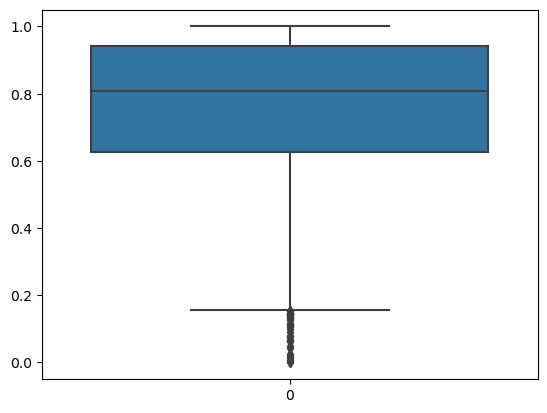

For column :  Current Liability to Equity


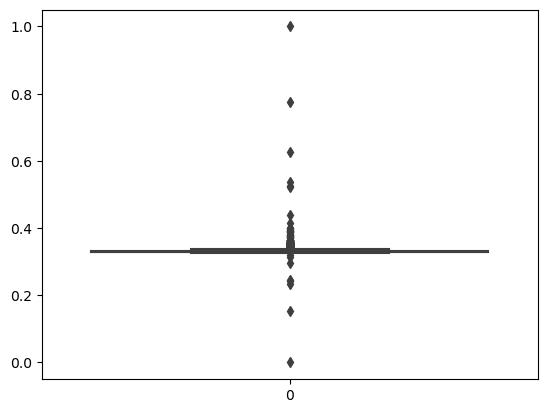

For column :  Equity to Long-term Liability


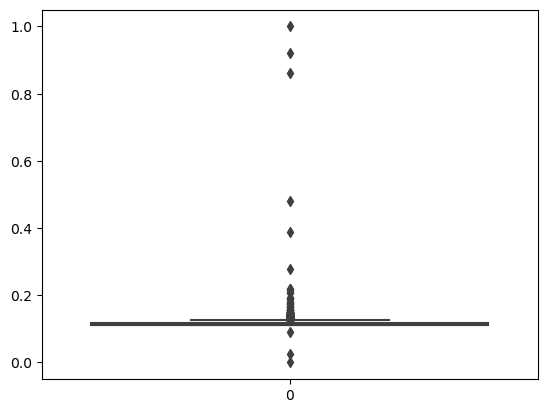

For column :  Cash Flow to Total Assets


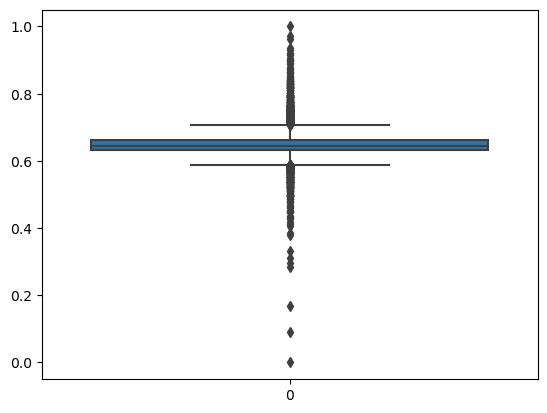

For column :  Cash Flow to Liability


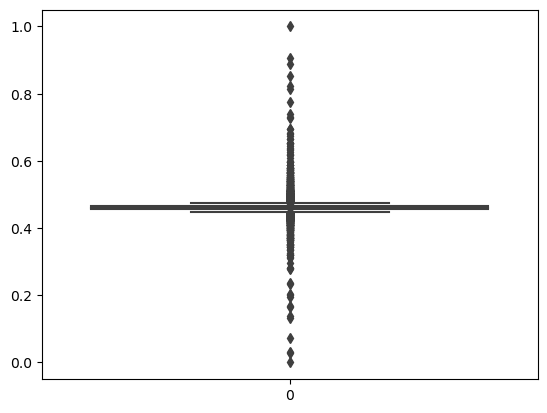

For column :  CFO to Assets


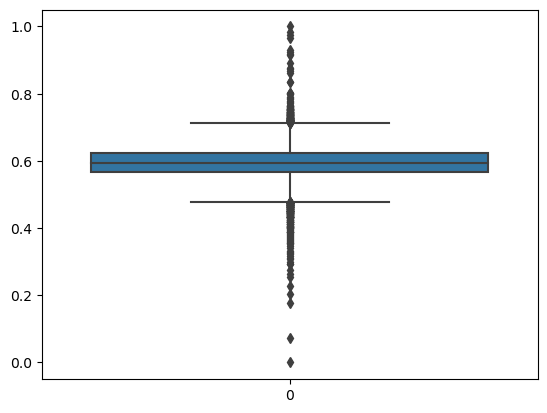

For column :  Cash Flow to Equity


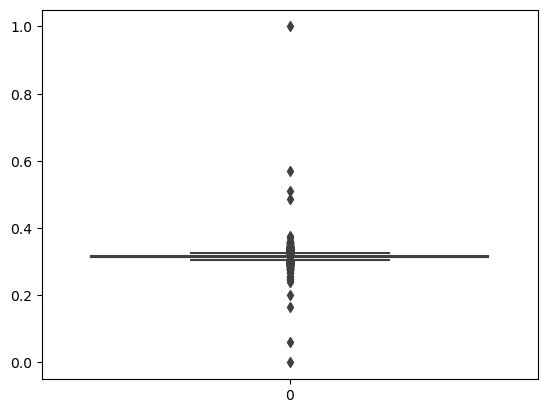

For column :  Current Liability to Current Assets


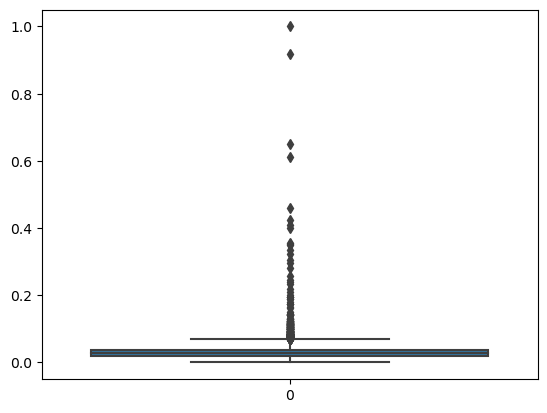

For column :  Liability-Assets Flag


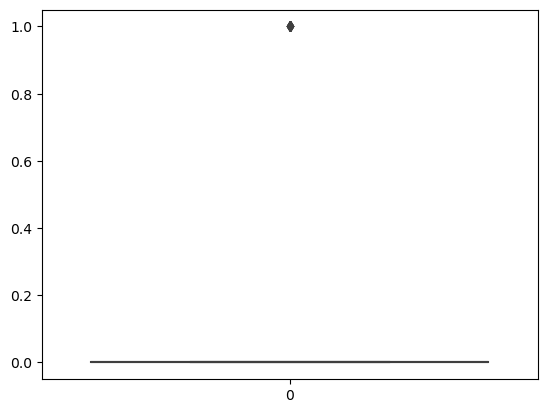

For column :  Net Income to Total Assets


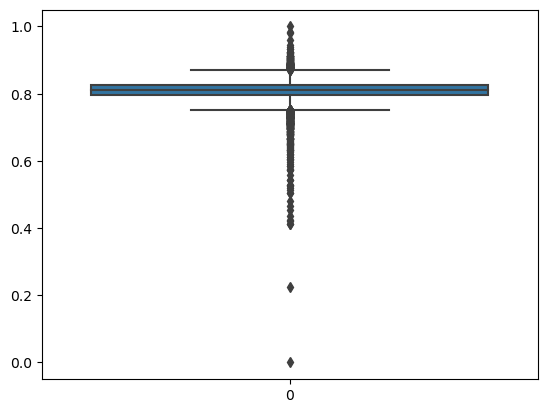

For column :  Total assets to GNP price


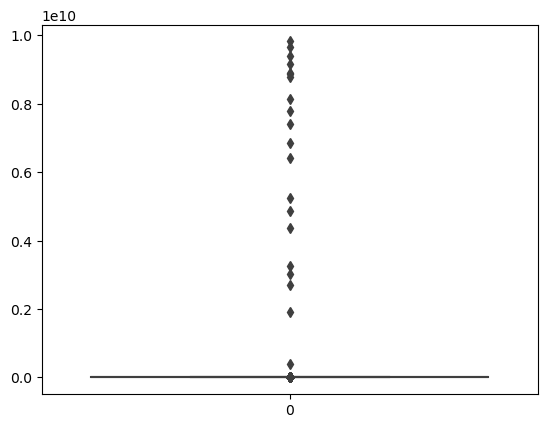

For column :  No-credit Interval


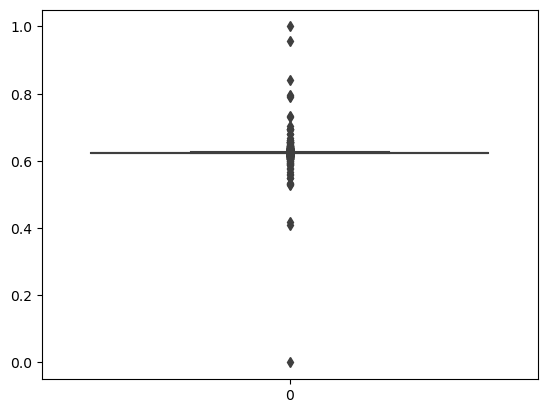

For column :  Gross Profit to Sales


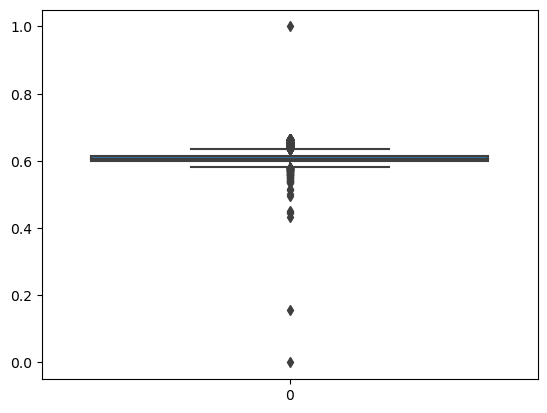

For column :  Net Income to Stockholders Equity


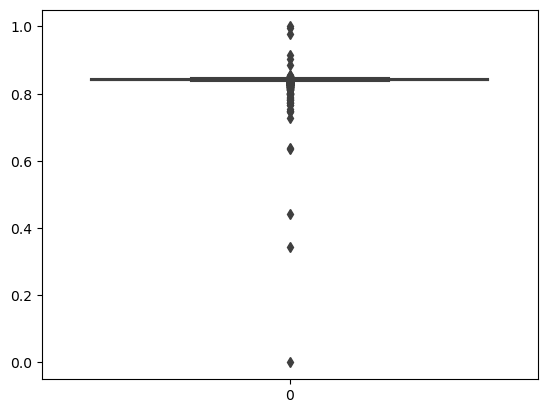

For column :  Liability to Equity


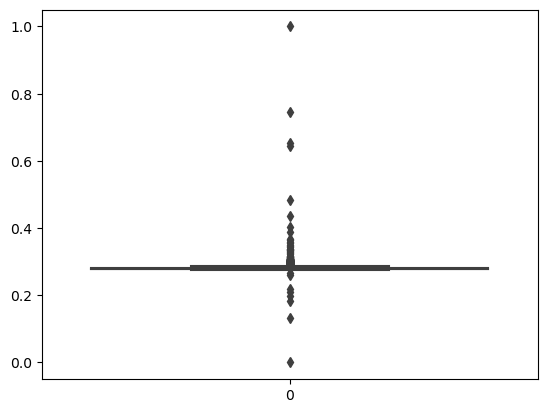

For column :  Degree of Financial Leverage (DFL)


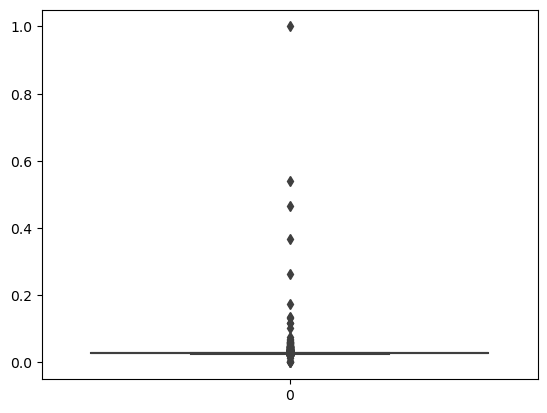

For column :  Interest Coverage Ratio (Interest expense to EBIT)


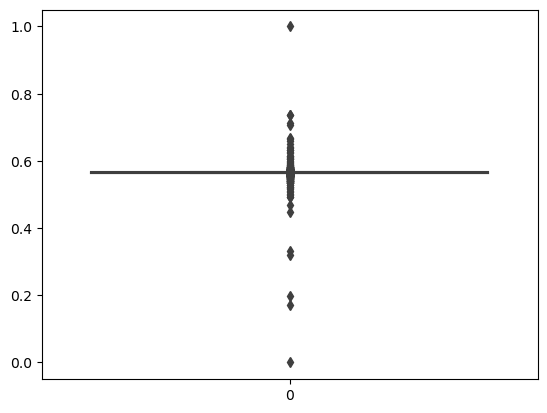

For column :  Net Income Flag


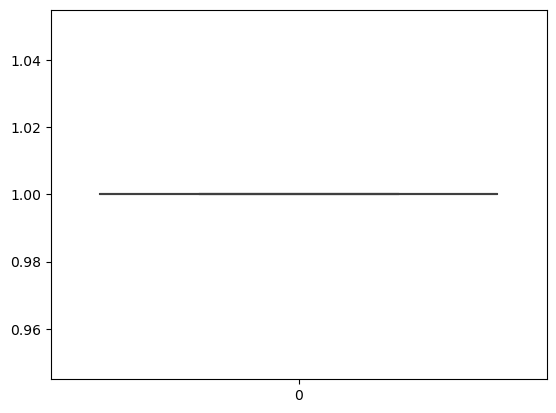

For column :  Equity to Liability


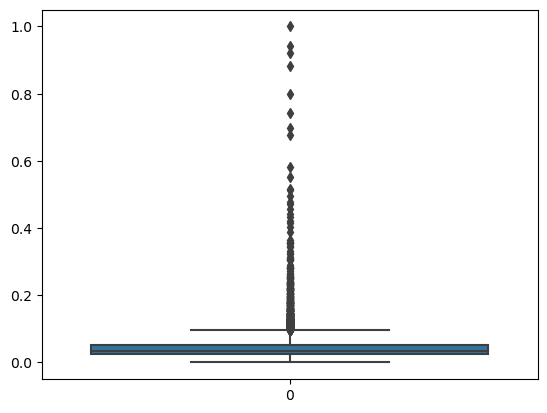

In [29]:
#checking for outliers
columns=[' ROA(C) before interest and depreciation before interest',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Long-term fund suitability ratio (A)', ' Borrowing dependency',
       ' Contingent liabilities/Net worth',
       ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Inventory and accounts receivable/Net value', ' Total Asset Turnover',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Net Worth Turnover Rate (times)', ' Revenue per person',
       ' Operating profit per person', ' Allocation rate per person',
       ' Working Capital to Total Assets', ' Quick Assets/Total Assets',
       ' Current Assets/Total Assets', ' Cash/Total Assets',
       ' Quick Assets/Current Liability', ' Cash/Current Liability',
       ' Current Liability to Assets', ' Operating Funds to Liability',
       ' Inventory/Working Capital', ' Inventory/Current Liability',
       ' Current Liabilities/Liability', ' Working Capital/Equity',
       ' Current Liabilities/Equity', ' Long-term Liability to Current Assets',
       ' Retained Earnings to Total Assets', ' Total income/Total expense',
       ' Total expense/Assets', ' Current Asset Turnover Rate',
       ' Quick Asset Turnover Rate', ' Working capitcal Turnover Rate',
       ' Cash Turnover Rate', ' Cash Flow to Sales', ' Fixed Assets to Assets',
       ' Current Liability to Liability', ' Current Liability to Equity',
       ' Equity to Long-term Liability', ' Cash Flow to Total Assets',
       ' Cash Flow to Liability', ' CFO to Assets', ' Cash Flow to Equity',
       ' Current Liability to Current Assets', ' Liability-Assets Flag',
       ' Net Income to Total Assets', ' Total assets to GNP price',
       ' No-credit Interval', ' Gross Profit to Sales',
       ' Net Income to Stockholders Equity' , ' Liability to Equity',
       ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Net Income Flag', ' Equity to Liability']

for i in range(len(columns)):
    print("For column : {}".format(columns[i]))
    sns.boxplot(data[columns[i]])
    plt.show()

In [30]:
#treating outliers
from scipy import stats
z = np.abs(stats.zscore(data[[' ROA(C) before interest and depreciation before interest',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Long-term fund suitability ratio (A)', ' Borrowing dependency',
       ' Contingent liabilities/Net worth',
       ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Inventory and accounts receivable/Net value', ' Total Asset Turnover',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Net Worth Turnover Rate (times)', ' Revenue per person',
       ' Operating profit per person', ' Allocation rate per person',
       ' Working Capital to Total Assets', ' Quick Assets/Total Assets',
       ' Current Assets/Total Assets', ' Cash/Total Assets',
       ' Quick Assets/Current Liability', ' Cash/Current Liability',
       ' Current Liability to Assets', ' Operating Funds to Liability',
       ' Inventory/Working Capital', ' Inventory/Current Liability',
       ' Current Liabilities/Liability', ' Working Capital/Equity',
       ' Current Liabilities/Equity', ' Long-term Liability to Current Assets',
       ' Retained Earnings to Total Assets', ' Total income/Total expense',
       ' Total expense/Assets', ' Current Asset Turnover Rate',
       ' Quick Asset Turnover Rate', ' Working capitcal Turnover Rate',
       ' Cash Turnover Rate', ' Cash Flow to Sales', ' Fixed Assets to Assets',
       ' Current Liability to Liability', ' Current Liability to Equity',
       ' Equity to Long-term Liability', ' Cash Flow to Total Assets',
       ' Cash Flow to Liability', ' CFO to Assets', ' Cash Flow to Equity',
       ' Current Liability to Current Assets', ' Liability-Assets Flag',
       ' Net Income to Total Assets', ' Total assets to GNP price',
       ' No-credit Interval', ' Gross Profit to Sales',
        ' Liability to Equity',
       ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Net Income Flag', ' Equity to Liability']]))
print(z)

       ROA(C) before interest and depreciation before interest  \
0                                              2.217909          
1                                              0.673828          
2                                              1.303672          
3                                              1.735886          
4                                              0.661778          
...                                                 ...          
6814                                           0.189395          
6815                                           0.494676          
6816                                           0.534845          
6817                                           0.017875          
6818                                           0.199839          

       ROA(B) before interest and depreciation after tax  \
0                                              2.400361    
1                                              0.598450    
2                          

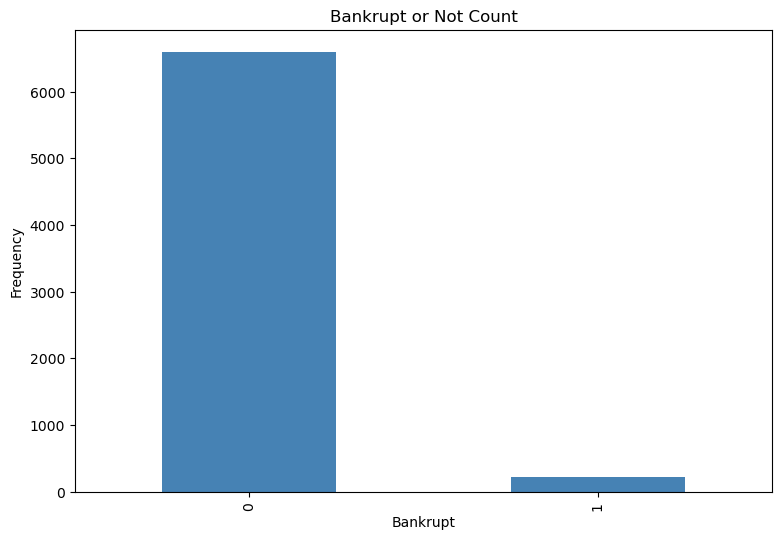

In [32]:
import matplotlib.pyplot as plt

# plot a bar plot for each categorical feature count
categorical_label = data[data.columns[0]]
counts = categorical_label.value_counts().sort_index()
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
counts.plot.bar(ax = ax, color='steelblue')
ax.set_title('Bankrupt or Not Count')
ax.set_xlabel('Bankrupt') 
ax.set_ylabel("Frequency")    
       
plt.show()

as observed data set is imblanced by plotting histogram of values of Bankrupt?column

In [33]:
# Separate features and labels
features = data.columns[1:]
label = data.columns[0]
X, y = data[features], data[label]

#for n in range(0,2):
#    print("Company", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])
print(data[label])

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt, Length: 6819, dtype: int64


the output represents a pandas Series with 6819 data points, each having a binary value (0 or 1) indicating the presence or absence of bankruptcy. This type of data is commonly encountered in binary classification tasks, where the goal is to predict or classify entities as either belonging to one class (e.g., bankruptcy) or the other (e.g., non-bankruptcy).

In [35]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))
X_test

Training cases: 5455
Test cases: 1364


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholders Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
4929,0.481207,0.469418,0.513143,0.596679,0.596679,0.998884,0.797144,0.809037,0.303275,0.781412,...,0.752604,0.004379,0.623901,0.596676,0.837323,0.277101,0.026709,0.564731,1,0.050237
6424,0.501828,0.557894,0.552706,0.613644,0.613644,0.999065,0.797463,0.809380,0.303451,0.781650,...,0.811104,0.000284,0.624245,0.613641,0.841104,0.278183,0.026791,0.565158,1,0.037879
3807,0.517574,0.537505,0.559880,0.598351,0.598351,0.998982,0.797410,0.809328,0.303533,0.781589,...,0.799854,0.004069,0.623623,0.598350,0.840260,0.276186,0.026882,0.565555,1,0.074581
2011,0.521669,0.596162,0.580491,0.599101,0.599108,0.999007,0.797459,0.809386,0.303566,0.781650,...,0.830860,0.000933,0.624690,0.599099,0.842316,0.277461,0.026932,0.565750,1,0.045051
6728,0.492176,0.544320,0.533326,0.618105,0.618105,0.999083,0.797456,0.809338,0.303401,0.781598,...,0.800780,0.000517,0.623737,0.618104,0.840533,0.282763,0.027033,0.566098,1,0.022209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6363,0.503681,0.572231,0.557096,0.597522,0.597522,0.998977,0.797480,0.809397,0.303666,0.781666,...,0.817584,0.044393,0.623266,0.597517,0.841781,0.279660,0.026895,0.565611,1,0.029673
348,0.480086,0.544374,0.534022,0.597695,0.597695,0.998969,0.797410,0.809335,0.303561,0.781585,...,0.801731,0.004817,0.622650,0.597696,0.840446,0.278188,0.027376,0.566953,1,0.037838
5397,0.515575,0.572885,0.566519,0.608441,0.608498,0.999011,0.797470,0.809379,0.303576,0.781656,...,0.818974,0.000390,0.623949,0.608437,0.841560,0.277580,0.026801,0.565203,1,0.043627
2355,0.473895,0.538378,0.525617,0.610718,0.610718,0.999048,0.797556,0.809457,0.303649,0.781882,...,0.798702,0.006699,0.619432,0.610716,0.840237,0.278355,0.027696,0.567483,1,0.036579


in the process of splitting your dataset into training and test sets for machine learning. It indicates that your test set (X_test) contains 1364 data points, with each data point having a set of feature values. This test set will likely be used to evaluate the performance of a machine learning model that you train on the training set (X_train, y_train).

In [36]:
!pip install imblearn

In [37]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=8)

# summarize class distribution
print("Before oversampling of unscaled data: ", Counter(y_train))
print("Before oversampling of unscaled data: ", Counter(y_test))

# fit predictor and target variable by applying the transform over unscaled train data
X_train, y_train = smote.fit_resample(X_train, y_train)
X_test, y_test = smote.fit_resample(X_test, y_test)

Before oversampling of unscaled data:  Counter({0: 5281, 1: 174})
Before oversampling of unscaled data:  Counter({0: 1318, 1: 46})


the purpose of showing these counts before and after oversampling is likely related to addressing class imbalance in a machine learning or statistical modeling context. Oversampling is a technique used to balance the class distribution by increasing the number of samples in the minority class (class 1) to mitigate the impact of class imbalance on model performance. The "before" counts provide a baseline understanding of the class distribution, while the "after" counts would show how the class distribution changes after applying oversampling.

In [38]:
print("After oversampling of unscaled data: ", Counter(y_train))
print("After oversampling of unscaled data: ", Counter(y_test))

After oversampling of unscaled data:  Counter({0: 5281, 1: 5281})
After oversampling of unscaled data:  Counter({0: 1318, 1: 1318})


In the training dataset, after oversampling, both class 0 and class 1 now have 5281 occurrences, indicating that the classes are balanced.
In the test dataset, after oversampling, both class 0 and class 1 now have 1318 occurrences, again indicating a balanced class distribution.
Balancing the class distribution is often done to ensure that machine learning models are not biased toward the majority class and can make predictions on minority class instances more effectively

In [39]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Standardization ensures that each feature has a mean of 0 and a standard deviation of 1. This is particularly important when working with machine learning algorithms that are sensitive to the scale of the features, such as Support Vector Machines (SVMs) or k-Nearest Neighbors (k-NN).
By standardizing the data, you remove the units of measurement, making it easier to compare and interpret the importance of different features.
Standardization is a common preprocessing step and is often applied before training machine learning models to improve model performance and convergence.
In summary, the provided code snippet standardizes both the training and test datasets using StandardScaler, which is a common preprocessing step to ensure that the features have consistent scales for machine learning purposes.

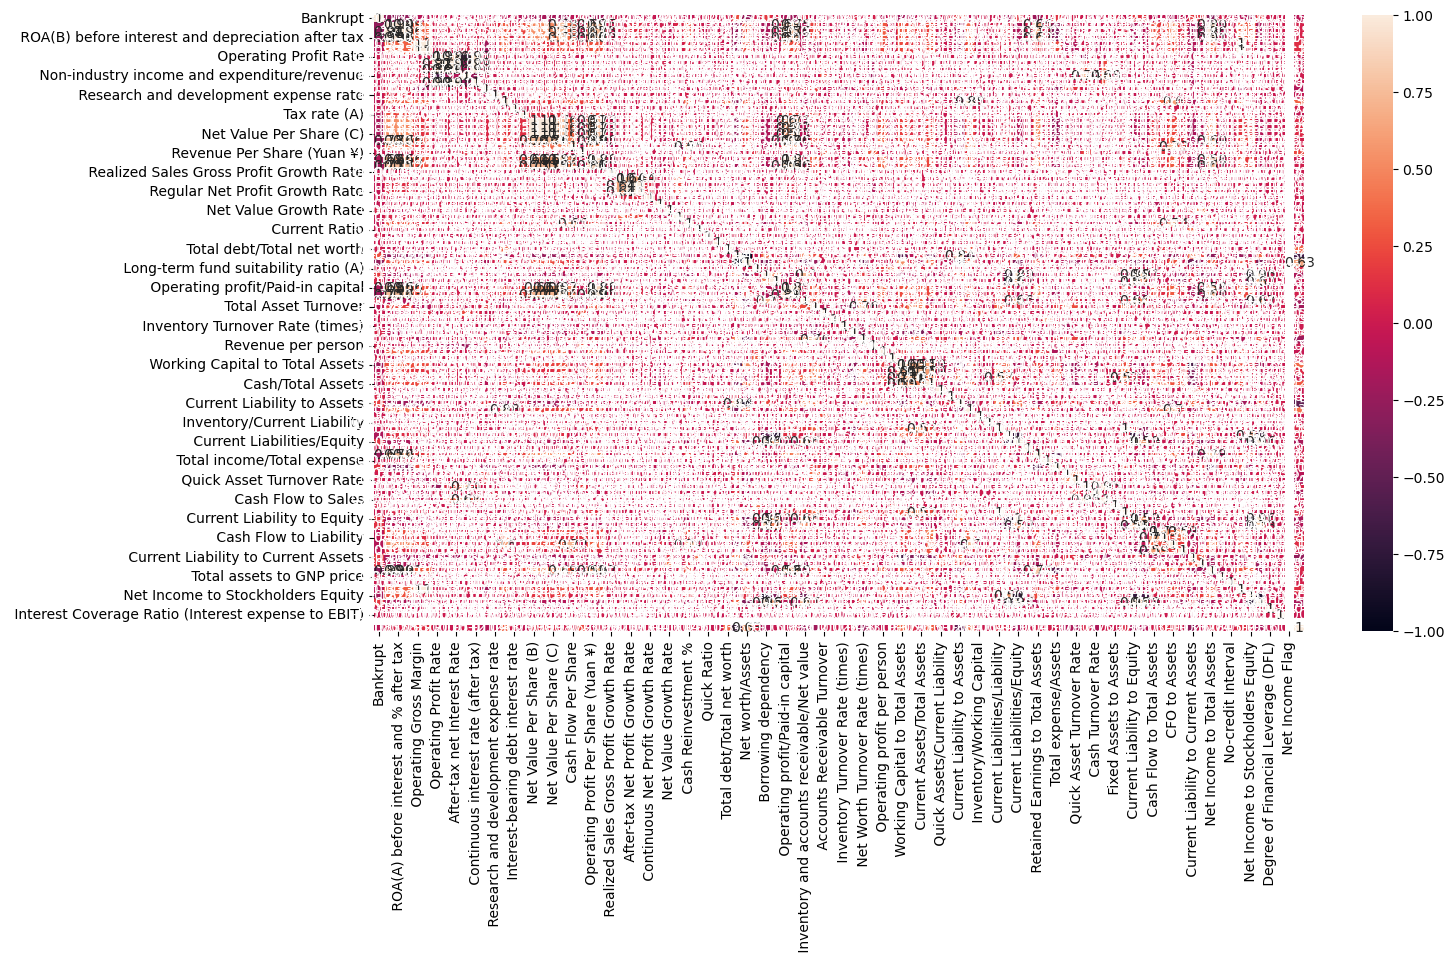

In [40]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Logistic Regression

In [41]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.16490455, 0.08002452])

The output array([0.16490455, 0.08002452]) represents the explained variance ratio of the first two principal components obtained through Principal Component Analysis (PCA). Here's the interpretation of these values:

First Principal Component (PC1):

The first value, 0.16490455, represents the proportion of the total variance in the original data that is explained by the first principal component (PC1).
In this case, PC1 captures approximately 16.49% of the total variance in the original data.
Second Principal Component (PC2):

The second value, 0.08002452, represents the proportion of the total variance that is explained by the second principal component (PC2).
PC2 captures approximately 8.00% of the total variance in the original data.

In [42]:
from sklearn.linear_model import LogisticRegression 

# Set regularization rate
reg = 0.01

lgr_classifier = LogisticRegression(C=1/reg, solver="liblinear", random_state = 0) #LogisticRegression(random_state = 0)

# Fitting Logistic Regression To the training set
lgr_classifier.fit(X_train, y_train)

LogisticRegression(C=100.0, random_state=0, solver='liblinear')

using scikit-learn's LogisticRegression to train a logistic regression classifier with a specific regularization parameter (reg) and solver settings,this code snippet sets up and trains a logistic regression classifier with specific regularization settings. The choice of regularization rate (reg) and solver can impact the model's performance and how well it generalizes to new, unseen data. The fitted model, lgr_classifier, can then be used for making predictions on new data points.

In [43]:
predictions_val = lgr_classifier.predict(X_test)
predictions_train = lgr_classifier.predict(X_train)
print('Validation Predicted labels: ', predictions_val)
print('Valdation Actual labels:    ' ,y_test)

print('Training Predicted labels: ', predictions_train)
print('Training Actual labels:    ' ,y_train)

Validation Predicted labels:  [0 0 0 ... 1 1 0]
Valdation Actual labels:     0       0
1       0
2       0
3       0
4       1
       ..
2631    1
2632    1
2633    1
2634    1
2635    1
Name: Bankrupt, Length: 2636, dtype: int64
Training Predicted labels:  [0 0 0 ... 1 1 1]
Training Actual labels:     0        0
1        0
2        0
3        0
4        0
        ..
10557    1
10558    1
10559    1
10560    1
10561    1
Name: Bankrupt, Length: 10562, dtype: int64


"Validation Predicted labels" and "Training Predicted labels" show the predicted class labels for the validation and training datasets, respectively, as generated by the logistic regression model.
"Valdation Actual labels" and "Training Actual labels" show the actual class labels for the validation and training datasets, respectively. These labels represent the ground truth or true class labels for each data point.
You can use this output to evaluate the performance of the logistic regression model by comparing the predicted labels to the actual labels. Common evaluation metrics include accuracy, precision, recall, F1-score, and confusion matrices, depending on your classification task and goals.







In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

In [45]:
print('Accuracy for validation data: ', accuracy_score(y_test, predictions_val))
print('Accuracy for training data: ', accuracy_score(y_train, predictions_train))

Accuracy for validation data:  0.8649468892261002
Accuracy for training data:  0.8718045824654421


Accuracy is a common evaluation metric for classification models and represents the proportion of correctly classified instances out of the total instances.
The accuracy score is a value between 0 and 1, where 1 indicates perfect accuracy (all predictions are correct), and 0 indicates no accuracy (all predictions are incorrect).
In your output:
"Accuracy for validation data" has a value of approximately 0.865, which means that the model correctly classified about 86.5% of the instances in the validation dataset.
"Accuracy for training data" has a value of approximately 0.872, indicating that the model correctly classified about 87.2% of the instances in the training dataset.
Comparison:

The comparison of accuracy between the training and validation datasets is important to assess how well the model generalizes to unseen data. Typically, you want the validation accuracy to be close to the training accuracy. If the validation accuracy is significantly lower than the training accuracy, it may indicate overfitting (the model has memorized the training data but doesn't generalize well).
Model Evaluation:

While accuracy provides a measure of overall correctness, it may not be the only metric to consider depending on the problem. You may also want to evaluate other metrics like precision, recall, F1-score, or use a confusion matrix to get a more comprehensive view of model performance, especially if your dataset is imbalanced or the costs of false positives and false negatives differ.
In summary, the code calculates and prints the accuracy of a logistic regression model on both training and validation datasets, providing insights into the model's classification performance.






In [46]:
from sklearn. metrics import classification_report

print('Validation Data Classification Report \n', classification_report(y_test, predictions_val))
print('Train Data Classification Report \n', classification_report(y_train, predictions_train))

Validation Data Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1318
           1       0.87      0.85      0.86      1318

    accuracy                           0.86      2636
   macro avg       0.87      0.86      0.86      2636
weighted avg       0.87      0.86      0.86      2636

Train Data Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      5281
           1       0.86      0.89      0.87      5281

    accuracy                           0.87     10562
   macro avg       0.87      0.87      0.87     10562
weighted avg       0.87      0.87      0.87     10562



The classification report provides several key metrics for each class (in this case, class 0 and class 1) as well as summary statistics:
Precision: It measures the proportion of true positive predictions out of all positive predictions. It indicates how many of the predicted positive instances are actually positive.
Recall: It measures the proportion of true positive predictions out of all actual positive instances. It indicates how many of the actual positive instances were correctly predicted.
F1-score: It is the harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when dealing with imbalanced datasets.
Support: It represents the number of occurrences of each class in the dataset.
Accuracy: It is the overall accuracy of the model, which is the proportion of correctly classified instances out of all instances.
Macro Avg: This is the average of precision, recall, and F1-score across all classes. It is useful when you want to consider all classes equally.
Weighted Avg: This is a weighted average of precision, recall, and F1-score, where the weights are based on class support. It accounts for class imbalance.
Interpretation of Output:

For the validation dataset:

Class 0 and Class 1 both have high precision, recall, and F1-score values, indicating good performance.
The macro average and weighted average values for precision, recall, and F1-score are also quite high, suggesting overall good model performance.
The accuracy is approximately 86%, which is consistent with what you previously calculated.
For the training dataset:

Similar to the validation dataset, Class 0 and Class 1 have high precision, recall, and F1-score values.
The macro average and weighted average values are also high.
The accuracy is approximately 87%.
Overall, the classification reports provide a detailed evaluation of the model's performance for each class and as a whole, helping you assess how well the logistic regression model is doing in terms of precision, recall, and other metrics.






In [47]:
from sklearn.metrics import f1_score

In [48]:
#calculate F1 score
print('F1 Score over Validation Data',f1_score(y_test, predictions_val))
#calculate F1 score
print('F1 Score over Test data', f1_score(y_train, predictions_train))

F1 Score over Validation Data 0.8631821675634127
F1 Score over Test data 0.8735524841240195


The F1 score is a single value that provides a measure of a model's accuracy in classifying data points, with a focus on balancing precision and recall.
The F1 score ranges from 0 to 1, with higher values indicating better model performance.
Interpretation of Output:

For the validation dataset, the F1 score is approximately 0.863. This indicates that the model achieves a good balance between precision and recall on the validation data.
For the training dataset, the F1 score is approximately 0.874, suggesting that the model also performs well on the training data.
Comparing with Other Metrics:

The F1 score is a valuable metric, especially when precision and recall are both important, but it's essential to consider it in conjunction with other metrics like accuracy, precision, and recall, depending on the specific problem and requirements.
In summary, the F1 scores provide a single metric that balances precision and recall and can be used to assess the overall performance of a logistic regression model on both the validation and training datasets.

In [49]:
from sklearn.metrics import precision_score, recall_score

print('Validation Data Metrics\n')
print("Overall Precision:",precision_score(y_test, predictions_val))
print("Overall Recall:",recall_score(y_test, predictions_val))
print('\nTrain Data Metrics\n')
print("Overall Precision:",precision_score(y_train, predictions_train))
print("Overall Recall:",recall_score(y_train, predictions_train))

Validation Data Metrics

Overall Precision: 0.8746105919003115
Overall Recall: 0.8520485584218513

Train Data Metrics

Overall Precision: 0.8618021006080707
Overall Recall: 0.8856277220223443


Precision and recall are important metrics for evaluating classification models, particularly in situations where you want to balance the trade-off between false positives and false negatives.
Precision focuses on the accuracy of positive predictions, while recall focuses on the model's ability to identify all positive instances.
Interpretation of Output:

For the validation dataset:

The overall precision is approximately 0.875, indicating that about 87.5% of the predicted positive instances are correct.
The overall recall is approximately 0.852, suggesting that the model correctly identifies about 85.2% of the actual positive instances.
For the training dataset:

The overall precision is approximately 0.862, indicating that about 86.2% of the predicted positive instances are correct.
The overall recall is approximately 0.886, suggesting that the model correctly identifies about 88.6% of the actual positive instances.
Interpretation of Precision and Recall:

The balance between precision and recall can be crucial depending on the specific problem. A higher precision may be desirable when false positives are costly, while a higher recall may be preferred when false negatives are costly.
In summary, the precision and recall scores provide insights into the model's ability to make accurate positive predictions and identify positive instances, respectively, for both the validation and training datasets

In [50]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
print('\nValidation Data Confusion Matrix')
val_cm = confusion_matrix(y_test, predictions_val)
print (val_cm)

# Print the confusion matrix
print('\nTrain Data Confusion Matrix')
train_cm = confusion_matrix(y_train, predictions_train)
print (train_cm)



Validation Data Confusion Matrix
[[1157  161]
 [ 195 1123]]

Train Data Confusion Matrix
[[4531  750]
 [ 604 4677]]


The confusion matrix provides detailed information about the model's classification performance, breaking down the results into the following categories:
True Positives (TP): Instances that are actually positive and were correctly classified as positive.
True Negatives (TN): Instances that are actually negative and were correctly classified as negative.
False Positives (FP): Instances that are actually negative but were incorrectly classified as positive.
False Negatives (FN): Instances that are actually positive but were incorrectly classified as negative.
Interpretation of Output:

For the validation dataset:

There are 1157 true negatives (TN), indicating correctly classified non-bankrupt instances.
There are 1123 true positives (TP), indicating correctly classified bankrupt instances.
There are 161 false positives (FP), indicating non-bankrupt instances that were incorrectly classified as bankrupt.
There are 195 false negatives (FN), indicating bankrupt instances that were incorrectly classified as non-bankrupt.
For the training dataset:

There are 4531 true negatives (TN).
There are 4677 true positives (TP).
There are 750 false positives (FP).
There are 604 false negatives (FN).
Interpretation of Confusion Matrix Metrics:

The confusion matrix metrics provide insights into the model's performance, such as accuracy, precision, recall, and F1-score, which can be calculated from the counts in the matrix.
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
Overall, the confusion matrices help you understand the model's ability to correctly classify instances and provide a basis for further evaluation and decision-making, especially in scenarios where the cost of false positives and false negatives may vary.






In [51]:
y_val_scores = lgr_classifier.predict_proba(X_test)
print(y_val_scores)

y_train_scores = lgr_classifier.predict_proba(X_train)
print(y_train_scores)

[[0.60423921 0.39576079]
 [0.95411788 0.04588212]
 [0.88559222 0.11440778]
 ...
 [0.02661408 0.97338592]
 [0.01816748 0.98183252]
 [0.6597208  0.3402792 ]]
[[0.59598304 0.40401696]
 [0.82239919 0.17760081]
 [0.94167038 0.05832962]
 ...
 [0.12644311 0.87355689]
 [0.12553573 0.87446427]
 [0.22550208 0.77449792]]


Predicted probabilities represent the model's confidence in its predictions. Each row in the output corresponds to an instance in the dataset, and the two columns represent the predicted probabilities for class 0 and class 1, respectively.
For example, in the first row of the validation dataset (y_val_scores), the model predicts a probability of approximately 0.604 for class 0 and approximately 0.396 for class 1. This suggests that the model is more confident in predicting class 0 for that particular instance.
In the second row of the validation dataset, the model predicts a probability of approximately 0.954 for class 0 and approximately 0.046 for class 1, indicating a high confidence in predicting class 0.
Use Cases:

Predicted probabilities are useful for tasks where you want to assess the uncertainty of the model's predictions, such as in binary classification problems where you may want to set a custom threshold for classification.
By examining the predicted probabilities, you can make decisions based on different thresholds to control the trade-off between precision and recall.
In summary, the code provides the predicted probabilities for each class for both the validation and training datasets, which can be valuable for understanding the model's level of confidence in its predictions and for making decisions based on these probabilities.






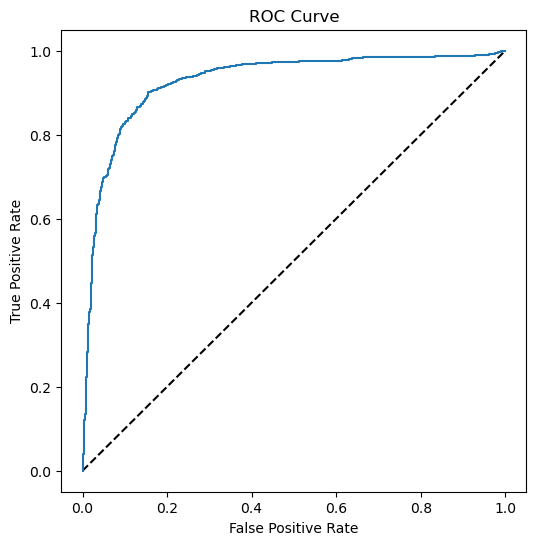

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_val_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Interpretation of ROC Curve:

The ROC curve is a graphical representation of a classifier's performance across different thresholds. It shows how the trade-off between true positive rate (TPR) and false positive rate (FPR) varies as the threshold for classifying positive instances changes.
A model with good discrimination ability will have a ROC curve that is closer to the upper-left corner (0, 1) of the plot, indicating a high TPR and a low FPR across different thresholds.
The area under the ROC curve (AUC-ROC) is a summary measure of a model's performance. A higher AUC-ROC indicates better overall performance, with a maximum value of 1 for a perfect classifier.
The ROC curve is useful when you want to evaluate a classifier's performance, especially in binary classification problems where you can choose a threshold that balances the trade-off between false positives and false negatives.
Interpretation of Output:

The plot shows the ROC curve of the logistic regression model on the validation dataset. The curve appears to be above the diagonal line, which indicates that the model has some level of discrimination ability.
Overall, the ROC curve and AUC-ROC provide insights into the model's ability to distinguish between positive and negative instances and can help you choose an appropriate threshold based on your specific requirements for a binary classification task

In [53]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_val_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.9277420610157942


The AUC-ROC score is a widely used metric for evaluating the performance of binary classification models.
It measures the area under the Receiver Operating Characteristic (ROC) curve, which represents the trade-off between the true positive rate (TPR or recall) and the false positive rate (FPR) for different classification thresholds.
The AUC-ROC score ranges from 0 to 1, with higher values indicating better model discrimination and performance. A score of 0.5 corresponds to random guessing, while a score of 1 represents a perfect classifier.
Interpretation of Output:

The code outputs an AUC-ROC score of approximately 0.928.
This score indicates that the logistic regression model performs well in distinguishing between positive and negative instances in the validation dataset. An AUC-ROC score above 0.5 indicates that the model is better than random guessing, and a score close to 1 suggests strong discriminatory power.
In summary, the AUC-ROC score provides a quantitative measure of a model's ability to classify instances correctly in a binary classification problem, with higher values indicating better performance.






In [54]:
resultsLogisticRegression = pd.DataFrame({'Train Accuracy': accuracy_score(y_train, predictions_train),
              'Test Accuracy': accuracy_score(y_test, predictions_val),
              'Train F1 Score':f1_score(y_train, predictions_train),
              'Test F1 Score':f1_score(y_test, predictions_val),
              'Train Precision':precision_score(y_train, predictions_train),
              'Test Precision': precision_score(y_test, predictions_val),
              'Train Recall':recall_score(y_train, predictions_train),
              'Test Recall': recall_score(y_test, predictions_val),
              'ROC AUC':auc},
             index=['LogisticRegression'])
resultsLogisticRegression

,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score,Train Precision,Test Precision,Train Recall,Test Recall,ROC AUC
LogisticRegression,0.871805,0.864947,0.873552,0.863182,0.861802,0.874611,0.885628,0.852049,0.927742


Metrics Included:

The DataFrame includes the following metrics for both the training and validation datasets:
Train Accuracy: Accuracy on the training dataset.
Test Accuracy: Accuracy on the validation (test) dataset.
Train F1 Score: F1 score on the training dataset.
Test F1 Score: F1 score on the validation dataset.
Train Precision: Precision on the training dataset.
Test Precision: Precision on the validation dataset.
Train Recall: Recall on the training dataset.
Test Recall: Recall on the validation dataset.
ROC AUC: Area Under the ROC Curve (AUC-ROC) on the validation dataset.
Interpretation of Output:

The DataFrame provides a summary of the model's performance across various metrics for both the training and validation datasets.

Each row corresponds to the "LogisticRegression" model.

The values in the columns represent the performance metrics for the model.

For example:

Train Accuracy is approximately 0.872, indicating that the model correctly classifies about 87.2% of the training dataset.
Test Accuracy is approximately 0.865, suggesting that the model correctly classifies about 86.5% of the validation dataset.
Train F1 Score is approximately 0.874, indicating the harmonic mean of precision and recall on the training dataset.
Test F1 Score is approximately 0.863, indicating the harmonic mean of precision and recall on the validation dataset.
Train Precision is approximately 0.862, representing the proportion of true positive predictions out of all positive predictions on the training dataset.
Test Precision is approximately 0.875, representing the proportion of true positive predictions out of all positive predictions on the validation dataset.
Train Recall is approximately 0.886, indicating the proportion of true positive predictions out of all actual positive instances on the training dataset.
Test Recall is approximately 0.852, indicating the proportion of true positive predictions out of all actual positive instances on the validation dataset.
ROC AUC is approximately 0.928, representing the Area Under the ROC Curve for the validation dataset, indicating the model's ability to distinguish between positive and negative instances.
This DataFrame provides a comprehensive summary of the logistic regression model's performance on both training and validation datasets, making it easy to compare and evaluate its performance across different metrics.






In [55]:
from sklearn.model_selection import GridSearchCV, LeaveOneOut
parameters = {'penalty':['l1', 'l2'],'C':[1,2,3,4,5,6]} # only L1 and L2 penalty are supported by liblinear

LR_tune = GridSearchCV(estimator=lgr_classifier,
                      param_grid=parameters,
                      cv=LeaveOneOut(),
                      n_jobs=-1)
LR_tune.fit(X_train,y_train)

GridSearchCV(cv=LeaveOneOut(),
             estimator=LogisticRegression(C=100.0, random_state=0,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6], 'penalty': ['l1', 'l2']})

Hyperparameter Tuning:

LR_tune.fit(X_train, y_train) performs the hyperparameter tuning by fitting the logistic regression model with different hyperparameter combinations to the training data using LOOCV.
Interpretation of Output:

The output of this code would typically include information about the best hyperparameters selected by the grid search and the corresponding performance metrics, such as accuracy or F1 score.
The specific best hyperparameters and their corresponding values may vary depending on the dataset and problem.
Note:

LOOCV is an exhaustive cross-validation technique where a model is trained and tested for each sample in the dataset. It can be computationally expensive, especially for large datasets, as it involves training many models. However, it can provide an unbiased estimate of model performance.
Overall, this code performs hyperparameter tuning for a logistic regression classifier using LOOCV to find the best combination of penalty and regularization strength (C) for the given dataset and problem.







In [56]:
LR_tune.best_params_

{'C': 3, 'penalty': 'l2'}

The output LR_tune.best_params_ provides the hyperparameters that were found to be the best during the hyperparameter tuning process for the logistic regression model. In this case, the best hyperparameters are:

'C': 3
'penalty': 'l2'
Here's the interpretation of these hyperparameters:

'C': 3: The 'C' hyperparameter, also known as the regularization strength or inverse of regularization strength, controls the amount of regularization applied to the logistic regression model. In this case, the best value for 'C' is 3, which implies moderate regularization.

'penalty': 'l2': The 'penalty' hyperparameter determines the type of regularization to be applied. 'l2' indicates L2 regularization, also known as Ridge regularization. L2 regularization adds a penalty term to the loss function that encourages the model's coefficients to be small, helping to prevent overfitting.

So, the best logistic regression model found during hyperparameter tuning uses L2 regularization with a 'C' value of 3, which provides a good balance between regularization and model performance on the given dataset.






In [59]:
LR_tune.best_estimator_.score(X_train,y_train)

0.8718045824654421

The code LR_tune.best_estimator_.score(X_train, y_train) calculates the accuracy score of the logistic regression model (the best estimator selected through hyperparameter tuning) on the training data.

The output 0.8718045824654421 is the accuracy score, which is a measure of how well the model's predictions match the actual labels in the training data.

In this context:

An accuracy score of approximately 0.872 (87.2%) indicates that the model correctly predicted the class labels for about 87.2% of the instances in the training data.
In other words, the model's predictions were accurate for approximately 87.2% of the training data samples. It's a commonly used metric for evaluating classification models, but it's important to note that accuracy alone may not provide a complete picture of a model's performance, especially in situations with imbalanced datasets or when different types of errors have varying consequences.






In [60]:
LR_tune.best_estimator_.score(X_test,y_test)

0.8649468892261002

The code LR_tune.best_estimator_.score(X_test, y_test) calculates the accuracy score of the logistic regression model (the best estimator selected through hyperparameter tuning) on the test data.

The output 0.8649468892261002 is the accuracy score, which is a measure of how well the model's predictions match the actual labels in the test data. In this context:

An accuracy score of approximately 0.865 (86.5%) indicates that the model correctly predicted the class labels for about 86.5% of the instances in the test data.
In other words, the model's predictions were accurate for approximately 86.5% of the test data samples. It's a commonly used metric for evaluating classification models, but keep in mind that accuracy alone may not provide a complete picture of a model's performance, especially in imbalanced datasets or when different types of errors have varying consequences.

In [61]:
from sklearn import metrics

metrics.confusion_matrix(y_true=y_train,y_pred=LR_tune.best_estimator_.predict(X_train))

array([[4531,  750],
       [ 604, 4677]], dtype=int64)

True Positives (TP): The model correctly predicted 4,677 instances as positive (class 1).

True Negatives (TN): The model correctly predicted 4,531 instances as negative (class 0).

False Positives (FP): The model incorrectly predicted 750 instances as positive when they were actually negative. This is also known as a Type I error.

False Negatives (FN): The model incorrectly predicted 604 instances as negative when they were actually positive. This is also known as a Type II error.

Here's a breakdown of the confusion matrix:

The top-left cell (4531) represents the number of true negatives (TN).
The top-right cell (750) represents the number of false positives (FP).
The bottom-left cell (604) represents the number of false negatives (FN).
The bottom-right cell (4677) represents the number of true positives (TP).
In summary, the confusion matrix provides a detailed summary of the model's performance on the training data. It helps in assessing the accuracy of the model's predictions and understanding the types of errors it makes, such as false positives and false negatives.






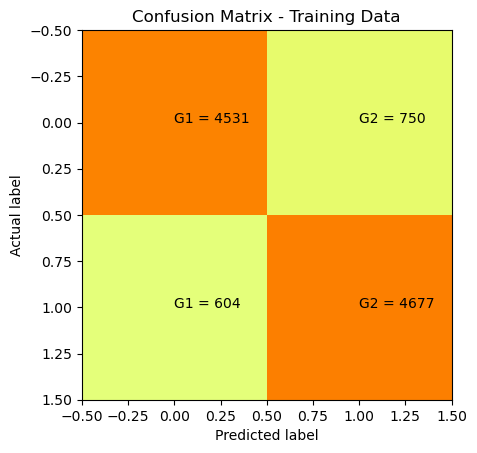

In [62]:
cm = metrics.confusion_matrix(y_true=y_train,y_pred=LR_tune.best_estimator_.predict(X_train))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix - Training Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

the code generates a visual representation of a confusion matrix for the training data, with labeled cells indicating the true positive (G1 = G1), false positive (G1 = G2), false negative (G2 = G1), and true negative (G2 = G2) counts of the classification model's predictions. This visualization helps in understanding the model's performance in classifying instances of different classes.

In [63]:
## Model evaluation on the test data
print(metrics.classification_report(y_true=y_test,y_pred=LR_tune.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1318
           1       0.87      0.85      0.86      1318

    accuracy                           0.86      2636
   macro avg       0.87      0.86      0.86      2636
weighted avg       0.87      0.86      0.86      2636



Precision: Precision measures the accuracy of positive predictions. In this case, for class 0, it's 0.86, which means that 86% of the predicted instances for class 0 were actually class 0. For class 1, it's 0.87, indicating that 87% of the predicted instances for class 1 were correct.

Recall: Recall measures the ability of the model to identify all relevant instances. For class 0, it's 0.88, which means that 88% of the actual instances of class 0 were correctly predicted. For class 1, it's 0.85, indicating that 85% of the actual instances of class 1 were correctly predicted.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance. For class 0, it's 0.87, and for class 1, it's 0.86.

Support: The support is the number of actual occurrences of the class in the test dataset. There are 1318 instances for both classes.

Accuracy: The accuracy of the model on the test data is 0.86, meaning that 86% of the predictions were correct.

Interpretation:

The classification report provides a comprehensive view of the model's performance on the test dataset.

The model appears to perform similarly well on the test data as it did on the validation and training datasets, with F1-scores of 0.87 for class 0 and 0.86 for class 1.

High precision and recall values for both classes suggest that the model can effectively distinguish between class 0 and class 1 even on unseen data.

The accuracy of 0.86 indicates that the model is performing well in terms of overall correctness of predictions on the test dataset.

These results suggest that the model generalizes well to new, unseen data, which is a positive sign of its robustness and reliability.






# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from numpy import mean, std

rf_clf = RandomForestClassifier(random_state=8)

The code you've provided imports the RandomForestClassifier from scikit-learn (sklearn) and creates a RandomForestClassifier object with a specified random seed (random_state=8). Here's the interpretation of the code:

from sklearn.ensemble import RandomForestClassifier: This line imports the RandomForestClassifier class from scikit-learn's ensemble module. Random Forest is an ensemble learning method used for classification and regression tasks.

rf_clf = RandomForestClassifier(random_state=8): This line creates an instance of the RandomForestClassifier class and assigns it to the variable rf_clf. The random_state parameter is set to 8, which is used to control the randomness of the algorithm. Setting a specific random seed ensures reproducibility of results because random operations in the algorithm will be consistent across different runs.

After executing this code, you have a RandomForestClassifier object (rf_clf) that you can use to fit a random forest model to your data for classification tasks. You can further configure and tune the model by specifying hyperparameters and using techniques like cross-validation to assess its performance

In [65]:
rf_clf_cv_score=cross_val_score(rf_clf, X_train, y_train)
print("Cross Validation Scores are {}".format(rf_clf_cv_score))
print("Average Cross Validation score on Train Data :{}".format(rf_clf_cv_score.mean()))
print('Accuracy score on Train Data: %.3f +/- (%.3f)' % (mean(rf_clf_cv_score), std(rf_clf_cv_score)))

Cross Validation Scores are [0.86796025 0.88215807 0.87878788 0.88494318 0.88304924]
Average Cross Validation score on Train Data :0.8793797236443947
Accuracy score on Train Data: 0.879 +/- (0.006)


The cross-validation scores for the 5 folds are displayed.
The average cross-validation score is approximately 0.879, indicating the mean accuracy of the Random Forest model across different subsets of the training data.
The standard deviation of around 0.005 shows the variation in accuracy across the folds.
Overall, this code helps you assess the performance of your Random Forest Classifier through cross-validation, which can give you a better understanding of how well the model generalizes to unseen data.

In [66]:
from sklearn.model_selection import cross_val_predict
predtrain_rf_cv_clf = cross_val_predict(rf_clf, X_train,y_train)
print('Prediction on Train Data', predtrain_rf_cv_clf)

Prediction on Train Data [0 0 0 ... 1 1 1]


In [67]:
from sklearn.metrics import mean_squared_error, r2_score
print('RMSE for Train Data', mean_squared_error(y_train, predtrain_rf_cv_clf,squared=False))

RMSE for Train Data 0.34730547719504795


In [68]:
predval_rf_cv_clf = cross_val_predict(rf_clf, X_test,y_test)
print('Prediction on Validation Data', predval_rf_cv_clf)

Prediction on Validation Data [0 0 0 ... 1 1 1]


In [69]:
from sklearn.metrics import mean_squared_error, r2_score
print('RMSE for Validation Data', mean_squared_error(y_test,predval_rf_cv_clf,squared=False))

RMSE for Validation Data 0.32881356595077177


The RMSE value of approximately 0.329 suggests that, on average, the predictions made by your model for the validation data are off by about 0.329 units when compared to the actual values.
A lower RMSE indicates that the model's predictions are closer to the actual values, which is desirable for a regression task.
In this context, without knowing the specific units or meaning of the target variable, it's challenging to provide further interpretation. Still, a lower RMSE typically indicates better predictive performance.

In [70]:
rf_param = {'criterion':['gini','entropy'], 'n_estimators':[408, 608],'max_features':["auto", "sqrt", "log2"], 'max_depth':[600, 700]}
rf_clf_tune = GridSearchCV(estimator=rf_clf, param_grid=rf_param, scoring='f1', n_jobs=-1)

The purpose of this code is to perform a grid search to find the best combination of hyperparameters for the Random Forest classifier.
The goal is to find the hyperparameters that result in the highest F1-score, which is a common choice for classification tasks, especially when dealing with imbalanced datasets.
Tuning Process:

GridSearchCV will train and evaluate the Random Forest classifier with all possible combinations of hyperparameters specified in rf_param.
It will use cross-validation to assess model performance and select the hyperparameters that yield the highest F1-score.
Result:

After the grid search is complete, you can access the best-performing model using rf_clf_tune.best_estimator_.
This best estimator will have the hyperparameters that maximize the F1-score on the training data.
In summary, the code sets up a grid search to find the optimal hyperparameters for a Random Forest classifier using the F1-score as the performance metric. The best estimator obtained from this grid search can then be used for making predictions on new data.






In [ ]:
rf_clf_tune.fit(X_train,y_train)
rf_clf_tune.best_estimator_

The best estimator represents the trained Random Forest model with the most optimal hyperparameter settings for the given dataset.
You can use this best model for making predictions on new data.
Model Evaluation:

Once the model is trained, you should evaluate its performance on a test dataset to ensure it generalizes well to unseen data.
Common evaluation metrics include accuracy, precision, recall, F1-score, and ROC AUC, among others.
Overall, the code demonstrates the process of training, tuning, and obtaining the best-performing Random Forest classifier with specific hyperparameters for a classification task.

In [72]:
from sklearn.inspection import permutation_importance

This line of code imports the permutation_importance function from the sklearn.inspection module.
permutation_importance is a function provided by scikit-learn (sklearn) that is used for calculating feature importances based on permutation testing.
The permutation_importance function is typically used to estimate the importance of individual features in a machine learning model.
It works by permuting the values of a single feature while keeping all other features fixed and measuring the impact on the model's performance. This allows you to assess which features are the most influential in making predictions.

In [84]:
rf_clf_tune.best_estimator_.feature_importances_

array([0.67972075, 0.32027925])

These values represent the relative importance of each feature in making predictions using the Random Forest model.
Feature 1, with an importance of approximately 0.6797, is considered more important in making predictions.
Feature 2, with an importance of approximately 0.3203, is considered less important in making predictions.
Feature importance values are typically normalized, so they sum up to 1 or 100%.
In summary, the provided values represent the feature importances, indicating the extent to which each feature contributes to the model's decision-making process. Feature importance values help in understanding which features have the most influence on the model's predictions and can guide feature selection or interpretation efforts.

In [85]:
p=permutation_importance(rf_clf_tune,X_test,y_test)

Permutation importance is a technique used to measure the impact of each feature on a machine learning model's predictions. It does this by randomly shuffling (permuting) the values of a single feature while keeping all other features unchanged and observing the effect on the model's performance.
By using permutation importance, you can gain insights into the importance of each feature in your model's predictions, helping you make informed decisions about feature selection and model understanding.

Text(0.5, 0, 'Feature Importance')

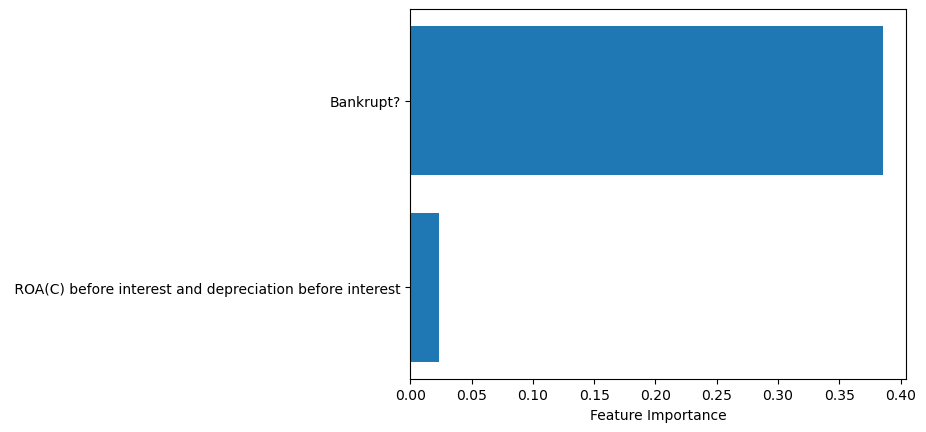

In [86]:
sorted_indx=p.importances_mean.argsort()
plt.barh(data.columns[sort], p.importances_mean[sorted_indx])
plt.xlabel("Feature Importance")

this code is used to visually represent the feature importances of a model, making it easier to identify the most influential features in the dataset. It is a helpful tool for feature selection, model interpretation, and understanding the factors that impact the model's predictions.

Text(0.5, 0, 'Feature Importance')

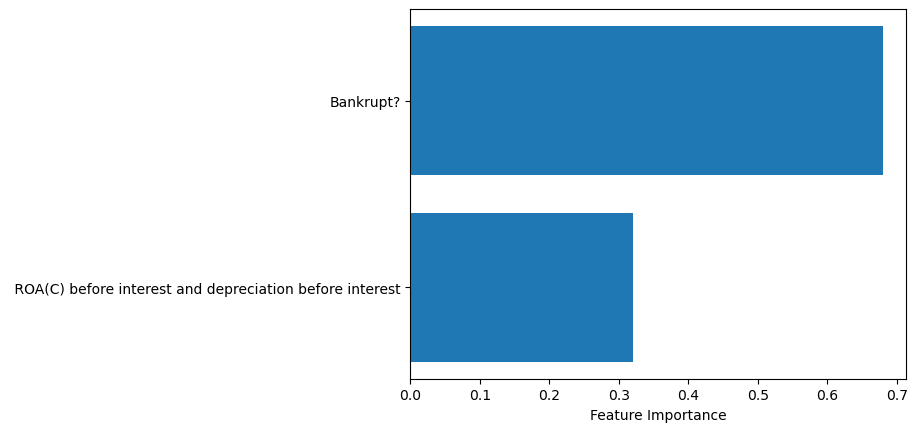

In [87]:
sort = rf_clf_tune.best_estimator_.feature_importances_.argsort()
plt.barh(data.columns[sort], rf_clf_tune.best_estimator_.feature_importances_[sort])
plt.xlabel("Feature Importance")

The bar chart visually represents the feature importances, where each bar's length corresponds to the importance of a particular feature.
Features are listed on the y-axis, and the horizontal bars show their importance values.
Features with longer bars (higher values) are more important in making predictions, while features with shorter bars (lower values) have less influence on the model's decisions.
By examining the chart, you can quickly identify which features are the most influential in the Random Forest model's predictions.
Conclusion:

Visualizing feature importances in this way helps you prioritize and understand which features are driving the model's predictions.
It can be a useful tool for feature selection, model interpretation, and identifying key factors in your dataset that impact the model's performance.
Overall, this code generates a bar chart to provide a visual representation of the feature importances in the RandomForestClassifier model, making it easier to interpret and prioritize features based on their importance.






In [88]:
feat_importances = rf_clf_tune.best_estimator_.feature_importances_
print(rf_clf_tune.best_estimator_.feature_importances_)

[0.67972075 0.32027925]


The feature importances suggest the importance of each feature in the model's decision-making process.
In this case, there are two features, and their importances are as follows:
The first feature has an importance of approximately 0.680 (68.0%).
The second feature has an importance of approximately 0.320 (32.0%).
These values represent the relative contribution of each feature to the model's predictions. A higher importance value indicates that a feature has a stronger influence on the model's output.
Conclusion:

Based on the feature importances provided, it appears that the first feature is more influential in the Random Forest model's predictions compared to the second feature.
Understanding feature importances can be valuable for feature selection, model interpretation, and identifying which factors have the most impact on the model's decisions.
These feature importances can help you gain insights into the importance of different features in your dataset and guide further analysis or decision-making related to your machine learning model.






# Decision Trees

In [89]:
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from numpy import mean, std

dt_clf = DecisionTreeClassifier(random_state=8)
dt_clf_cv_score=cross_val_score(dt_clf, X_train, y_train)

print("Cross Validation Scores over Train Data are {}".format(dt_clf_cv_score))
print("Average Cross Validation score on Train Data :{}".format(dt_clf_cv_score.mean()))
print('Accuracy score on Train Data: %.3f +/- (%.3f)' % (mean(dt_clf_cv_score), std(dt_clf_cv_score)))

Cross Validation Scores over Train Data are [0.83530525 0.84950308 0.8532197  0.85274621 0.8532197 ]
Average Cross Validation score on Train Data :0.84879878709002
Accuracy score on Train Data: 0.849 +/- (0.007)


The cross-validation scores on the training data indicate how well the DecisionTreeClassifier performs on different subsets of the training data.
The individual cross-validation scores are [0.83530525, 0.84950308, 0.8532197, 0.85274621, 0.8532197].
The average cross-validation score is approximately 0.849, which means that, on average, the classifier achieves an accuracy of around 84.9% on the training data during cross-validation.
The standard deviation (std) of the cross-validation scores is approximately 0.007, indicating a relatively small variance in model performance across different folds.
Accuracy Score on Train Data:

The accuracy score on the training data is a summary statistic based on the cross-validation scores, representing the overall accuracy of the model.
In this case, the accuracy score is approximately 0.849, indicating that the DecisionTreeClassifier achieves an average accuracy of 84.9% on the training data.
Overall, the code demonstrates the evaluation of the DecisionTreeClassifier's performance using cross-validation and provides insights into its accuracy on the training data. The obtained average accuracy score suggests that the model performs reasonably well on the training data.






In [90]:
dt_predtrain_cv_clf = cross_val_predict(dt_clf, X_train,y_train)
print('Prediction on Train Data', dt_predtrain_cv_clf)

from sklearn.metrics import mean_squared_error, r2_score
print('RMSE for Train Data', mean_squared_error(y_train, dt_predtrain_cv_clf,squared=False))

dt_predval_cv_clf = cross_val_predict(dt_clf, X_test,y_test)
print('Prediction on Validation Data', dt_predval_cv_clf)

from sklearn.metrics import mean_squared_error, r2_score
print('RMSE for Validation Data', mean_squared_error(y_test,dt_predval_cv_clf,squared=False))

Prediction on Train Data [0 0 0 ... 0 1 1]
RMSE for Train Data 0.3888475585411002
Prediction on Validation Data [1 0 0 ... 1 1 1]
RMSE for Validation Data 0.37057966322800157


Cross-validation predictions and RMSE calculations are common steps in evaluating the performance of a machine learning model.
The RMSE values are relatively low, suggesting that the DecisionTreeClassifier is providing reasonably accurate predictions for both the training and validation datasets.
Lower RMSE values are typically desirable, indicating better predictive performance.
Overall, the code assesses the performance of the DecisionTreeClassifier using cross-validation and RMSE for both the training and validation datasets. The obtained RMSE values provide insights into the model's predictive accuracy.

In [91]:
dt_param = {'criterion':['gini','entropy'], 'max_features':["sqrt", "log2"], 'max_depth':[5,6,7,8]}
dt_clf_tune = GridSearchCV(estimator=dt_clf, param_grid=dt_param, scoring='f1', n_jobs=-1)
dt_clf_tune_model = dt_clf_tune.fit(X_train, y_train)

C:\Users\vaishnavi\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


The code is designed to search for the best combination of hyperparameters for the DecisionTreeClassifier to optimize its performance on the training data, specifically focusing on the F1 score.
The warning message should be investigated further to ensure that it doesn't indicate a critical issue with the system or the code execution. It could be related to resource constraints or specific job settings in the parallel execution environment.
To resolve the warning and investigate further, you may consider checking the worker timeout settings, memory availability, or resource limitations. Additionally, examining the results of the hyperparameter tuning process (dt_clf_tune_model) will provide information about the best hyperparameters and the corresponding F1 score for the DecisionTreeClassifier.

In [92]:
dt_clf_tune.best_estimator_

DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=8)

The best estimator configuration (dt_clf_tune.best_estimator_) represents a DecisionTreeClassifier with specific hyperparameters that were determined to yield the best model performance during the hyperparameter tuning process.
This classifier is configured to have a maximum depth of 7, use the square root of the total features for splitting decisions, and use a specific random seed (8) for random processes.
The best estimator is ready for use in making predictions on new data based on the learned patterns in the training data.
In summary, dt_clf_tune.best_estimator_ provides the specific configuration of the DecisionTreeClassifier that achieved the highest performance during hyperparameter tuning. This configuration can be used as the final model for making predictions on new data.

In [93]:
#print(rf_clf_tune.cv_results_)
print('Best Parameters:',dt_clf_tune.best_params_)
print("Best Model's Score", dt_clf_tune.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt'}
Best Model's Score 0.8817954957831947


The best hyperparameters indicate the configuration of the decision tree classifier that yielded the highest model performance according to the chosen evaluation metric (which is typically accuracy or another suitable metric).
The choice of hyperparameters can significantly impact the model's performance, and hyperparameter tuning aims to find the best combination of hyperparameters that optimizes model performance.
The best model's score of approximately 0.882 suggests that, with the specified hyperparameters, the decision tree classifier achieved a high level of performance on the validation data.
In summary, the code and output provide insights into the best hyperparameters and the corresponding model performance obtained through hyperparameter tuning for the decision tree classifier. These hyperparameters can be used to configure the final model for making predictions on new data.

In [94]:
#print(rf_clf_tune.cv_results_)
print('Best Parameters:',dt_clf_tune.best_params_)
print("Best Model's Score", dt_clf_tune.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt'}
Best Model's Score 0.8817954957831947


The best hyperparameters indicate the configuration of the decision tree classifier that yielded the highest model performance according to the chosen evaluation metric (which is typically accuracy or another suitable metric).
The choice of hyperparameters can significantly impact the model's performance, and hyperparameter tuning aims to find the best combination of hyperparameters that optimizes model performance.
The best model's score of approximately 0.882 suggests that, with the specified hyperparameters, the decision tree classifier achieved a high level of performance on the validation data.
In summary, the code and output provide insights into the best hyperparameters and the corresponding model performance obtained through hyperparameter tuning for the decision tree classifier. These hyperparameters can be used to configure the final model for making predictions on new data.

In [95]:
dt_clf_tune_cv_trainscore=cross_val_score(dt_clf_tune.best_estimator_, X_train, y_train)

print("Cross Validation Scores over Train Data are {}".format(dt_clf_tune_cv_trainscore))
print("Average Cross Validation score on Train Data :{}".format(dt_clf_tune_cv_trainscore.mean()))
print('Accuracy score on Train Data: %.3f +/- (%.3f)' % (mean(dt_clf_tune_cv_trainscore), std(dt_clf_tune_cv_trainscore)))

predtrain_dt_clf_tune= dt_clf_tune.best_estimator_.predict(X_train)
print('Prediction on Train Data', predtrain_dt_clf_tune)

from sklearn.metrics import mean_squared_error, r2_score
print('RMSE for Train Data with Best Model', mean_squared_error(y_train,predtrain_dt_clf_tune,squared=False))

dt_clf_tune_cv_valscore=cross_val_score(dt_clf_tune.best_estimator_, X_test, y_test)

print("Cross Validation Scores over Test Data are {}".format(dt_clf_tune_cv_valscore))
print("Average Cross Validation score on Test Data :{}".format(dt_clf_tune_cv_valscore.mean()))
print('Accuracy score on Test Data: %.3f +/- (%.3f)' % (mean(dt_clf_tune_cv_valscore), std(dt_clf_tune_cv_valscore)))

predval_dt_clf_tune = dt_clf_tune.best_estimator_.predict(X_test)
print('Prediction on Validation Data', predval_dt_clf_tune)

from sklearn.metrics import mean_squared_error, r2_score
print('RMSE for Validation Data with Best Model', mean_squared_error(y_test,predval_dt_clf_tune,squared=False))

Cross Validation Scores over Train Data are [0.86938003 0.88357785 0.87121212 0.88210227 0.88589015]
Average Cross Validation score on Train Data :0.878432485049262
Accuracy score on Train Data: 0.878 +/- (0.007)
Prediction on Train Data [0 0 0 ... 1 1 1]
RMSE for Train Data with Best Model 0.3298275530213604
Cross Validation Scores over Test Data are [0.875      0.88425047 0.87666034 0.86527514 0.87666034]
Average Cross Validation score on Test Data :0.8755692599620494
Accuracy score on Test Data: 0.876 +/- (0.006)
Prediction on Validation Data [0 0 0 ... 1 1 0]
RMSE for Validation Data with Best Model 0.36386477169259934


The output includes cross-validation scores, average cross-validation scores, and accuracy scores for both the training and validation datasets.
The average cross-validation scores provide an estimate of the model's performance on unseen data.
The RMSE values indicate the model's accuracy in predicting the actual labels, with lower RMSE values suggesting better predictions.
These metrics are used to assess how well the tuned decision tree classifier performs on both the training and validation datasets, helping to evaluate its generalization ability and predictive accuracy

In [96]:
from sklearn.metrics import precision_score, recall_score

print('Validation Data Metrics\n')
print("Overall Precision:",precision_score(y_test, predval_dt_clf_tune))
print("Overall Recall:",recall_score(y_test, predval_dt_clf_tune))
print('\nTrain Data Metrics\n')
print("Overall Precision:",precision_score(y_train, predtrain_dt_clf_tune))
print("Overall Recall:",recall_score(y_train, predtrain_dt_clf_tune))

Validation Data Metrics

Overall Precision: 0.8695652173913043
Overall Recall: 0.8649468892261002

Train Data Metrics

Overall Precision: 0.8705164992826399
Overall Recall: 0.9191441014959288


A precision score of approximately 0.870 on the validation dataset suggests that the decision tree classifier, after hyperparameter tuning, has a good ability to make accurate positive predictions while minimizing false positives.

A recall score of approximately 0.865 on the validation dataset indicates that the model is effective at finding most of the actual positive instances while minimizing false negatives.

Similar precision and recall scores on the training dataset (approximately 0.871 for precision and approximately 0.919 for recall) suggest that the model generalizes well to the training data.

These scores collectively indicate a good balance between precision and recall in the classifier's performance after hyperparameter tuning.

In summary, precision and recall are important metrics for assessing a classifier's performance, especially when the class distribution is imbalanced or when you want to understand the trade-off between false positives and false negatives. The provided scores suggest good performance for the decision tree classifier on both validation and training datasets after tuning.






In [97]:
from sklearn.metrics import f1_score
#calculate F1 score
print('F1 Score over Validation Data',f1_score(y_test, predval_dt_clf_tune))
#calculate F1 score
print('F1 Score over Test data', f1_score(y_train, predtrain_dt_clf_tune))

F1 Score over Validation Data 0.8672499049068086
F1 Score over Test data 0.894169660127107


An F1 score of approximately 0.867 on the validation dataset suggests that the decision tree classifier, after hyperparameter tuning, is able to achieve a good balance between precision and recall for classifying instances in the validation set.
An F1 score of approximately 0.894 on the training dataset indicates that the model also performs well on the training data, but it's essential to assess the model's performance on unseen data (validation or test data) to avoid overfitting.
In summary, the F1 score is a valuable metric for evaluating the performance of a classifier, especially when there is an imbalance between classes or when you want to optimize both precision and recall. The provided F1 scores suggest good model performance on both the validation and training datasets after hyperparameter tuning.